<a href="https://colab.research.google.com/github/RRRashila/Road_Traffic_Accident_Severity_Project/blob/main/Project_1_Road_Traffic_Severity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Road Traffic Severity Classification**

## 🧾**Description:**
This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.

Source of dataset - https://dans.knaw.nl/nl/data-diensten/narcis/

## **Problem Statement:**
The target feature is **Accident_severity** which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be **f1-score**.


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# py.init_notebook_mode()

In [ ]:
# Read the csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MGP_PRoject_Course/RTA Dataset.csv')

In [ ]:
# Check the first 5 rows of the data
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestri

In [ ]:
# Check the last 5 rows of the data
df.tail()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
12311   Lorry (11?40Q)            Owner                     NaN   
12312       Automobile            Owner                     NaN   
12313            Bajaj            Owner                  2-5yrs   
12314  Lorry (41?100Q)            Owner                  2-5yrs   
12315            Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                 Road_allignment Types_of_Junction  \
12311             Tangent road with flat terrain       No junction   
12312                                Escarpments       No junction   
12313  Tangent road with mountainous terrain and       No junction   
12314  Tangent road with mountainous terrain and       No junction   
12315  Tangent road with mountainous terrain and           O Shape   

      Road_surface_type Road_surface_conditions       Light_conditions  \
12311     Asphalt roads                     Dry               Daylight   
12312     Asphalt roads                     Dry               Daylight   
12313     Asphalt roads                     Dry               Daylight   
12314     Asphalt roads                     Dry  Darkness - lights lit   
12315     Asphalt roads                     Dry  Darkness - lights lit   

      Weather_conditions               Type_of_collision  \
12311             Normal  Vehicle with vehicle collision   
12312             Normal  Vehicle with vehicle collision   
12313             Normal  Vehicle with vehicle collision   
12314             Normal  Vehicle with vehicle collision   
12315             Normal  Vehicle with vehicle collision   

       Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
12311                            2                     1   Going straight   
12312                            2                     1            Other   
12313                            1                     1            Other   
12314                            2                     1            Other   
12315                            2                     1         Stopping   

        Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
12311               na              na                   na                na   
12312               na              na                   na                na   
12313  Driver or rider            Male                31-50                 3   
12314               na              na                   na                na   
12315       Pedestrian          Female       

In [ ]:
# Check the random sample of data
df.sample(10)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
11391  16:53:00   Wednesday              18-30          Male   
3782   16:28:00     Tuesday            Over 51          Male   
2154    9:47:00      Friday              31-50          Male   
3034    9:00:00     Tuesday              31-50          Male   
2792   12:18:00      Friday              18-30          Male   
349    12:46:00      Friday              31-50          Male   
2925   18:40:00      Friday            Unknown        Female   
4021   16:05:00      Monday            Unknown          Male   
9730    8:59:00      Monday           Under 18          Male   
10613  17:45:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
11391         High school                Employee         Above 10yr   
3782   Junior high school                   Owner             5-10yr   
2154    Elementary school                Employee              2-5yr   
3034   Junior high school                Employee              1-2yr   
2792   Junior high school                   Owner             5-10yr   
349                   NaN                     NaN                NaN   
2925   Junior high school                Employee              2-5yr   
4021   Junior high school                Employee              2-5yr   
9730    Elementary school                Employee              2-5yr   
10613  Junior high school                Employee              1-2yr   

        Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
11391              Taxi            Owner                  2-5yrs   
3782    Lorry (41?100Q)            Owner                 Unknown   
2154         Automobile            Owner                 Unknown   
3034    Lorry (41?100Q)            Owner                   1-2yr   
2792                NaN            Owner                     NaN   
349                 NaN              NaN                     NaN   
2925         Automobile            Owner                     NaN   
4021   Pick up upto 10Q            Owner                     NaN   
9730    Lorry (41?100Q)     Organization                  2-5yrs   
10613        Automobile            Owner                     NaN   

      Defect_of_vehicle Area_accident_occured  \
11391               NaN          Office areas   
3782          No defect                 Other   
2154                NaN                   NaN   
3034          No defect          Office areas   
2792          No defect          Office areas   
349                 NaN                 Other   
2925                NaN          Office areas   
4021          No defect                 Other   
9730          No defect                 Other   
10613         No defect          Church areas   

                                       Lanes_or_Medians  \
11391                       Double carriageway (median)   
3782   Two-way (divided with broken lines road marking)   
2154                                              other   
3034                                  Undivided Two way   
2792                        Double carriageway (median)   
349    Two-way (divided with broken lines road marking)   
2925   Two-way (divided with broken lines road marking)   
4021   Two-way (divided with broken lines road marking)   
9730                                  Undivided Two way   
10613                                 Undivided Two way   

                                 Road_allignment Types_of_Junction  \
11391             Tangent road with flat terrain               NaN   
3782              Tangent road with flat terrain       No junction   
2154              Tangent road with flat terrain           Y Shape   
3034              Tangent road with flat terrain           Y Shape   
2792              Tangent road with flat terrain          Crossing   
349               Tangent road with flat terrain           Y Shape   
2925              Tangent road with flat terrain           Y Shape   
4021          

## **Basic Data Exploration**


- Checking the shape of the data
- Checking the columns of the data
- Checking the datatypes
- Looking for missing values
- Putting it all together
- Looking for duplicates
- Statistical description of the data


**Check the shape of the data**

In [ ]:
df.shape

(12316, 32)

**Check the columns of the data**

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

**Check the data types of the columns in the data**

In [ ]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

**Check for the missing values present in the data**

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

**Check the summary of the data in one command**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

**Observations**
- There are 12316 observations in the dataset.
- There are 32 columns in this dataset in which only 2 columns are of integer data type (Number_of_vehicles_involved and Number_of_casualties) and others are of object data type.
- Memory usage is 3 MB.
- The datatype of **Time** column needs to be changed to datetime data type.
- **Accident_severity** is the target variable for this problem statement.


**Convert the Time column datatype to datetime data type**

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])


In [ ]:
df

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0     2023-09-15 17:02:00      Monday              18-30          Male   
1     2023-09-15 17:02:00      Monday              31-50          Male   
2     2023-09-15 17:02:00      Monday              18-30          Male   
3     2023-09-15 01:06:00      Sunday              18-30          Male   
4     2023-09-15 01:06:00      Sunday              18-30          Male   
...                   ...         ...                ...           ...   
12311 2023-09-15 16:15:00   Wednesday              31-50          Male   
12312 2023-09-15 18:00:00      Sunday            Unknown          Male   
12313 2023-09-15 13:55:00      Sunday            Over 51          Male   
12314 2023-09-15 13:55:00      Sunday              18-30        Female   
12315 2023-09-15 13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0               Automobile            Owner              Above 10yr   
1      Public (> 45 seats)            Owner                 5-10yrs   
2          Lorry (41?100Q)            Owner                     NaN   
3      Public (> 45 seats)     Governmental                     NaN   
4                      NaN            Owner                 5-10yrs   
...                    ...              ...                     ...   
12311       Lorry (11?40Q)            Owner                     NaN   
12312           Automobile            Owner                     NaN   
12313                Bajaj            Owner                  2-5yrs   
12314      Lorry (41?100Q)            Owner                  2-5yrs   
12315                Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
0             No defect     Residential areas   
1             No defect          Office areas   
2             No defect    Recreational areas   
3             No defect          Office areas   
4             No defect      Industrial areas   
...                 ...                   ...   
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent road with fl

In [ ]:
df.dtypes

Time                           datetime64[ns]
Day_of_week                            object
Age_band_of_driver                     object
Sex_of_driver                          object
Educational_level                      object
Vehicle_driver_relation                object
Driving_experience                     object
Type_of_vehicle                        object
Owner_of_vehicle                       object
Service_year_of_vehicle                object
Defect_of_vehicle                      object
Area_accident_occured                  object
Lanes_or_Medians                       object
Road_allignment                        object
Types_of_Junction                      object
Road_surface_type                      object
Road_surface_conditions                object
Light_conditions                       object
Weather_conditions                     object
Type_of_collision                      object
Number_of_vehicles_involved             int64
Number_of_casualties              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

**Check for the duplicate data in the dataset**

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [ ]:
df.duplicated().sum()

0

- There are no duplicate data in the dataset.

**Statistical description of the data**

In [ ]:
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [ ]:
df.describe(include="all")

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count                 12316       12316              12316         12316   
unique                 1074           7                  5             3   
top     2023-09-15 15:30:00      Friday              18-30          Male   
freq                    120        2041               4271         11437   
first   2023-09-15 00:01:00         NaN                NaN           NaN   
last    2023-09-15 23:59:00         NaN                NaN           NaN   
mean                    NaN         NaN                NaN           NaN   
std                     NaN         NaN                NaN           NaN   
min                     NaN         NaN                NaN           NaN   
25%                     NaN         NaN                NaN           NaN   
50%                     NaN         NaN                NaN           NaN   
75%                     NaN         NaN                NaN           NaN   
max                     NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   
first                  NaN                     NaN                NaN   
last                   NaN                     NaN                NaN   
mean                   NaN                     NaN                NaN   
std                    NaN                     NaN                NaN   
min                    NaN                     NaN                NaN   
25%                    NaN                     NaN                NaN   
50%                    NaN                     NaN                NaN   
75%                    NaN                     NaN                NaN   
max                    NaN                     NaN                NaN   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
count            11366            11834                    8388   
unique              17                4                       6   
top         Automobile            Owner                 Unknown   
freq              3205            10459                    2883   
first              NaN              NaN                     NaN   
last               NaN              NaN                     NaN   
mean               NaN              NaN                     NaN   
std                NaN              NaN                     NaN   
min                NaN              NaN                     NaN   
25%                NaN              NaN                     NaN   
50%                NaN              NaN                     NaN   
75%                NaN              NaN                     NaN   
max                NaN              NaN                     NaN   

       Defect_of_vehicle Area_accident_occured  \
count               7889                 12077   
unique                 3                    14   
top            No defect                 Other   
freq                7777                  3819   
first                NaN                   NaN   
last                 NaN                   NaN   
mean                 NaN                   NaN   
std                  NaN                   NaN   
min                  NaN                   NaN   
25%                  NaN                   NaN   
50%                  NaN                   NaN   
75%                  NaN                   NaN   
max                  NaN                   NaN   

                                        Lanes_or_Medians  \
count                                              11931   
unique                                                 7   
top     Two-way (divided with broken lines road marking)   
freq                                                441

## Exploring the data using Visualizations

### Univariate Analysis




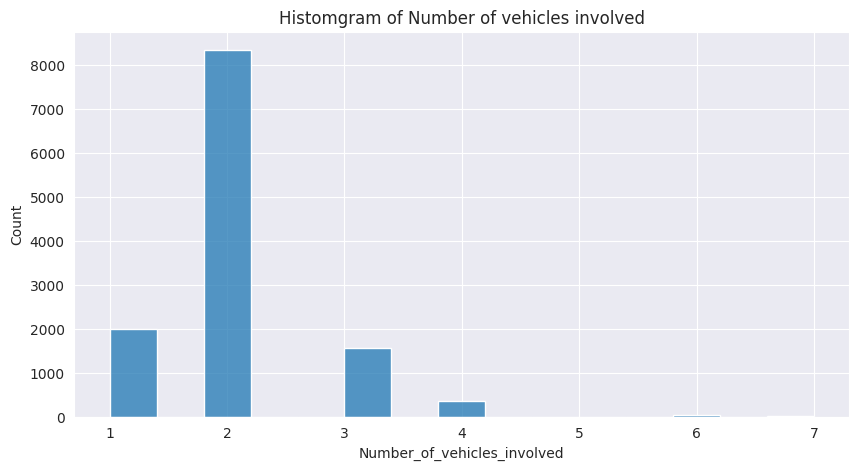

In [ ]:
# checking the distribution of 'Number_of_vehicles_involved'
plt.figure(figsize=(10,5))
sns.histplot(df['Number_of_vehicles_involved'])
plt.title('Histomgram of Number of vehicles involved')
plt.show()

- Number of vehicles involved ranges from 1 to 4 vehicles.
- Most of the accidents involved two vehicles.

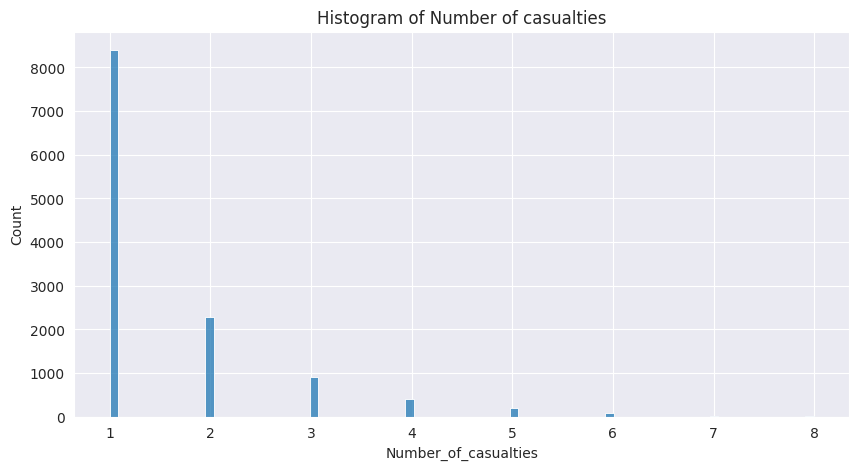

In [ ]:
# checking the distribution of 'Number_of_casualties'
plt.figure(figsize=(10,5))
sns.histplot(df['Number_of_casualties'])
plt.title('Histogram of Number of casualties')
plt.show()

- Number of casualties ranges from 1 to 8.
- Most of the time there is only one casualty followed by 2.

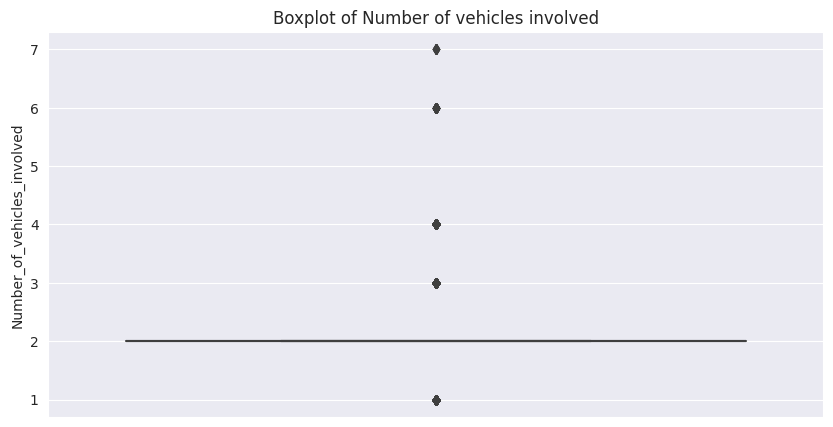

In [ ]:
# Boxplot of 'Number_of_vehicles_involved'
plt.figure(figsize=(10,5))
sns.boxplot(data = df, y = 'Number_of_vehicles_involved')
plt.title('Boxplot of Number of vehicles involved')
plt.show()

- Number of vehicles involved has outlies on both sides.

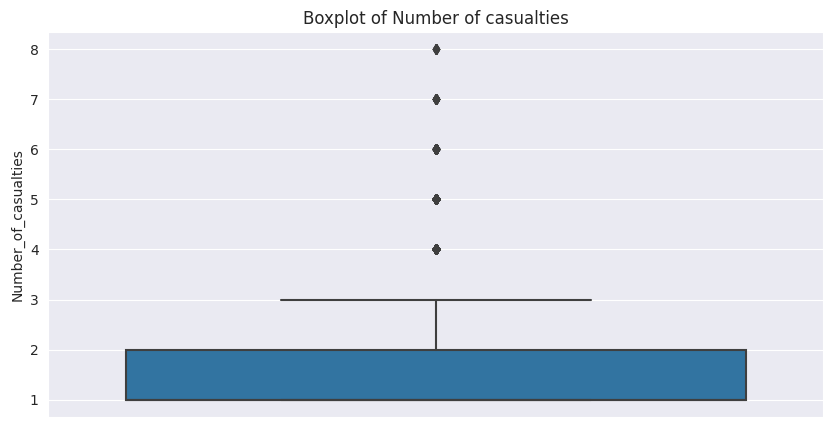

In [ ]:
# Boxplot of 'Number_of_casualties'
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Number_of_casualties')
plt.title('Boxplot of Number of casualties')
plt.show()

- Number of casualties also has outliers in upper side.

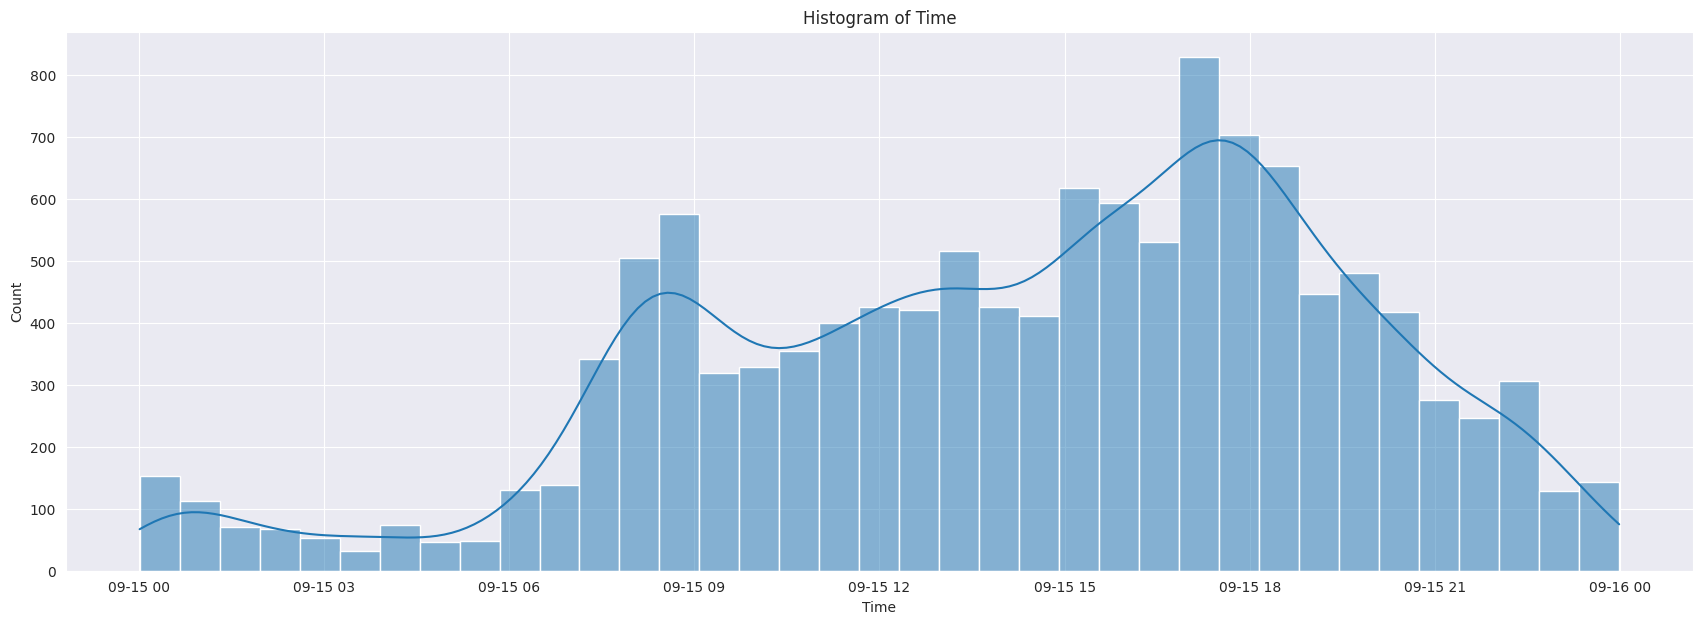

In [ ]:
# Checking the distribution of Time
plt.figure(figsize=(21,7))
sns.histplot(data=df, x='Time',kde = True);
plt.title('Histogram of Time')
plt.show()

- The distribution of Time is skewed towards left.
- Many acidents happend in peak time at morning 8 to 10 am and in afternoon 3 to 6 pm.

#### Distribution of categorical features

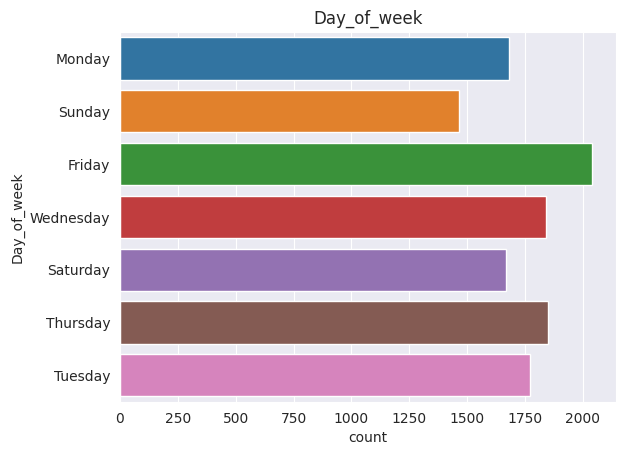

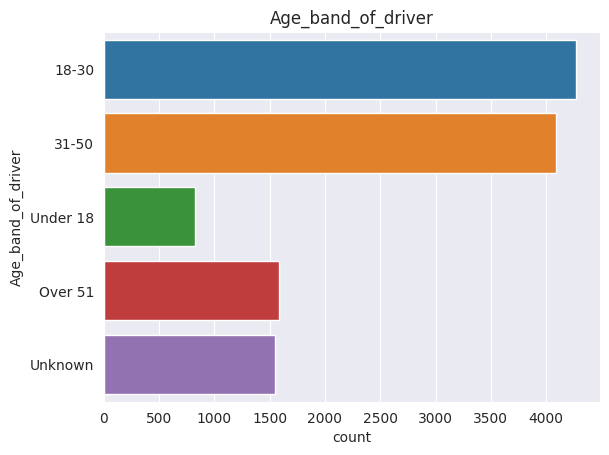

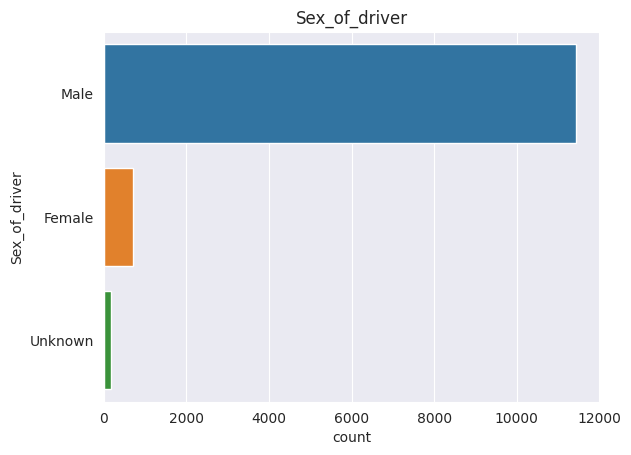

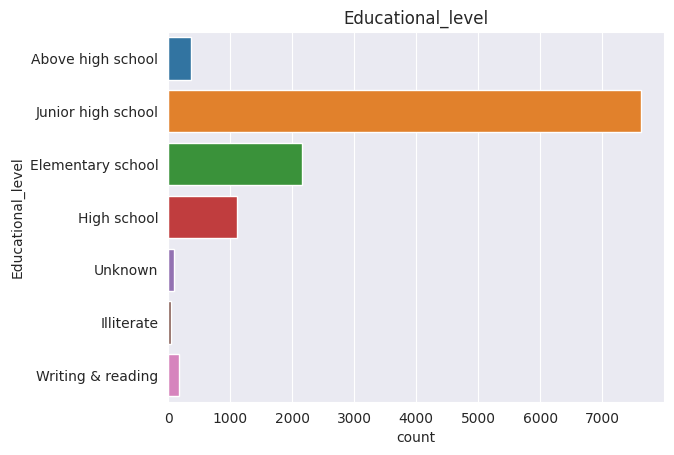

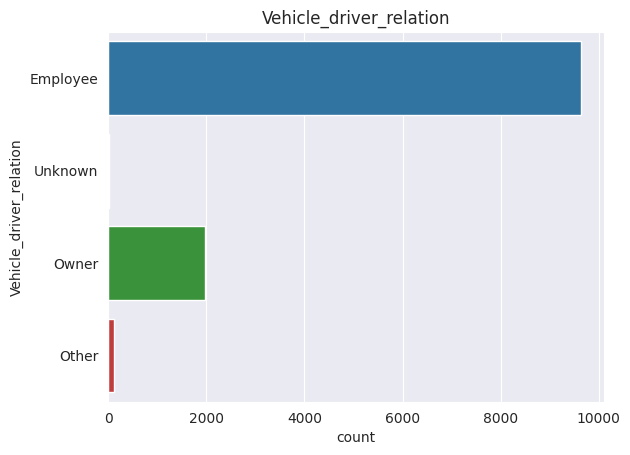

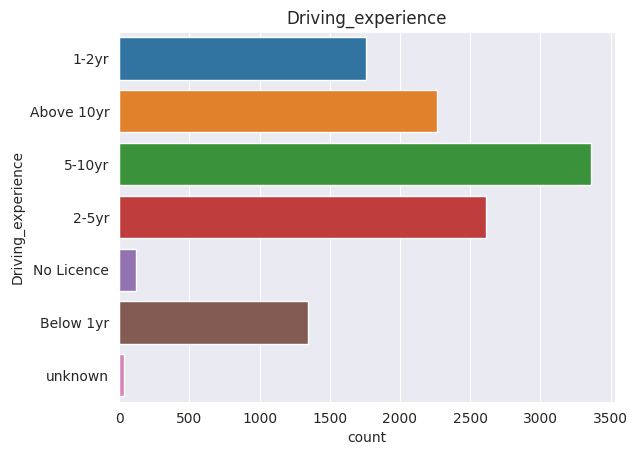

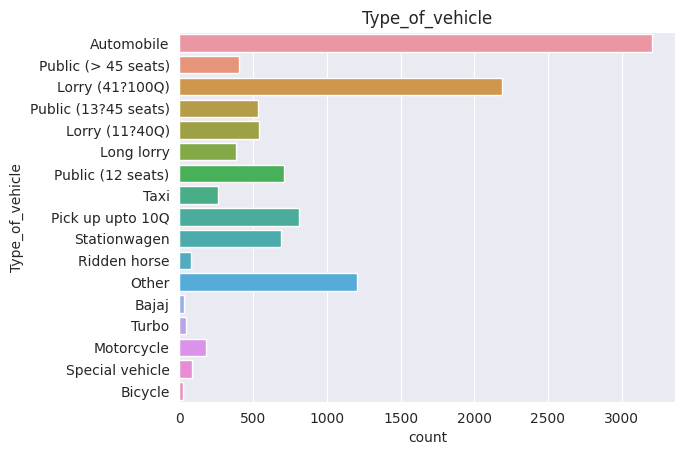

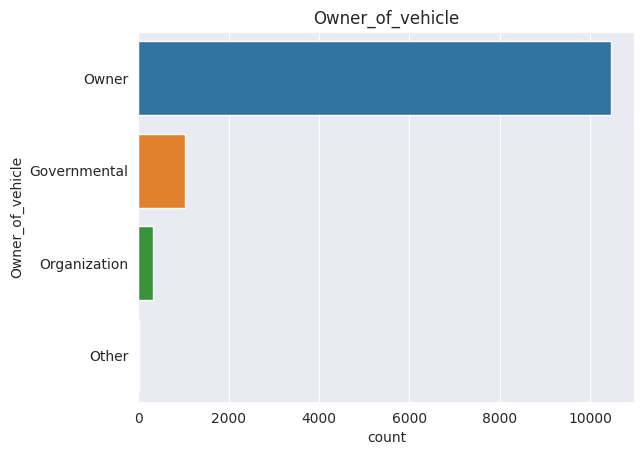

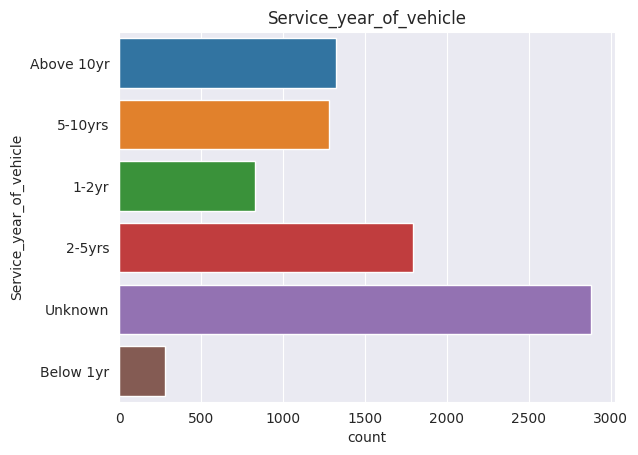

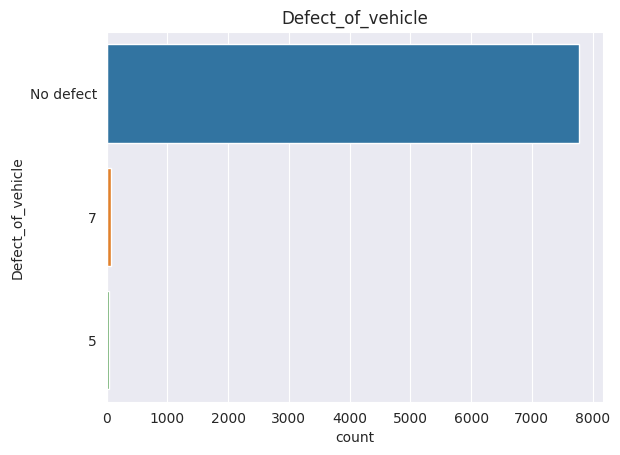

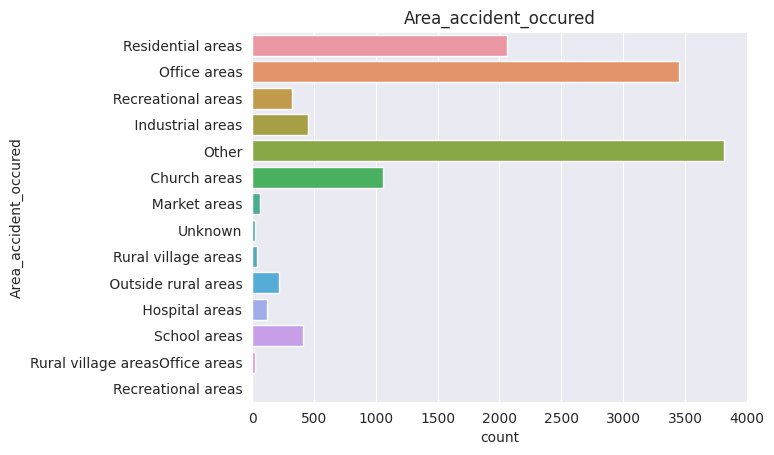

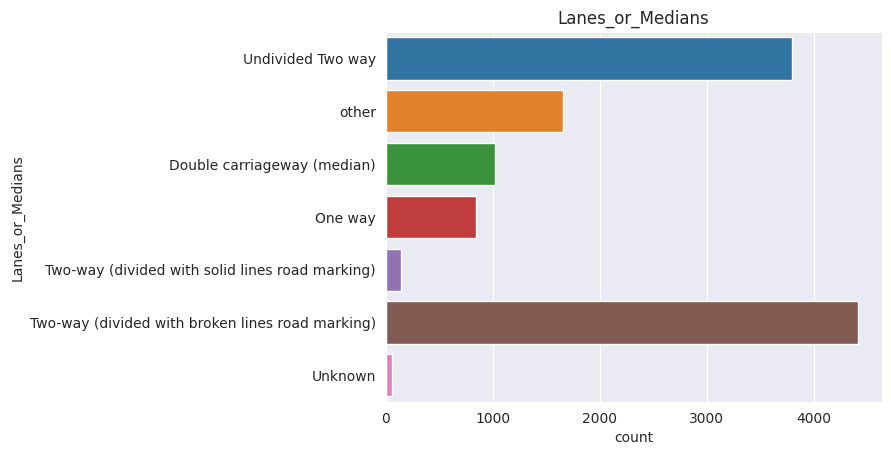

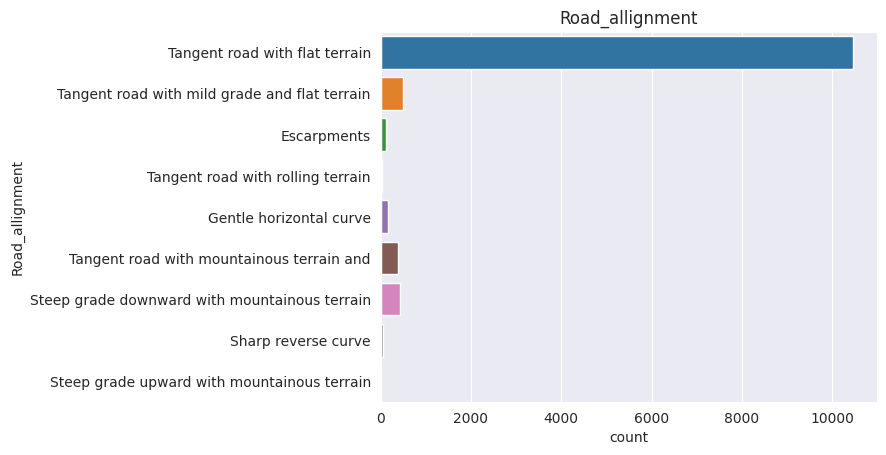

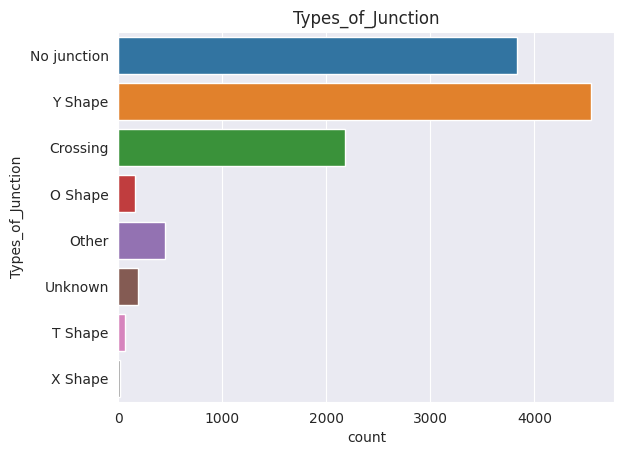

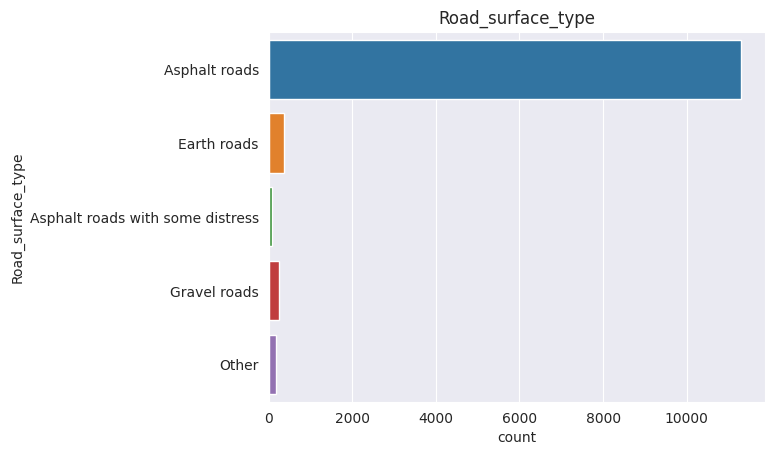

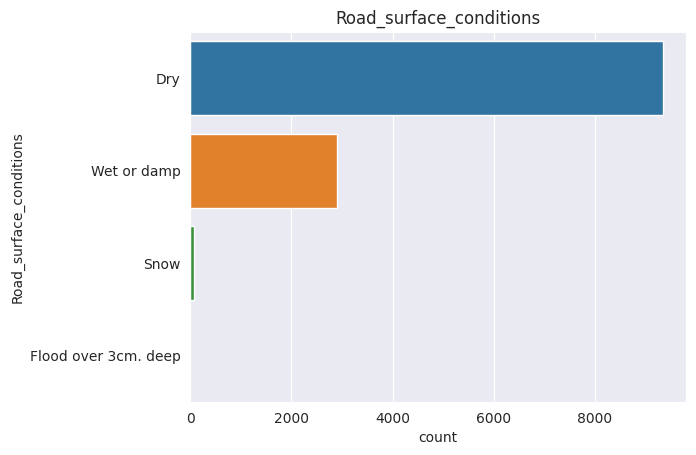

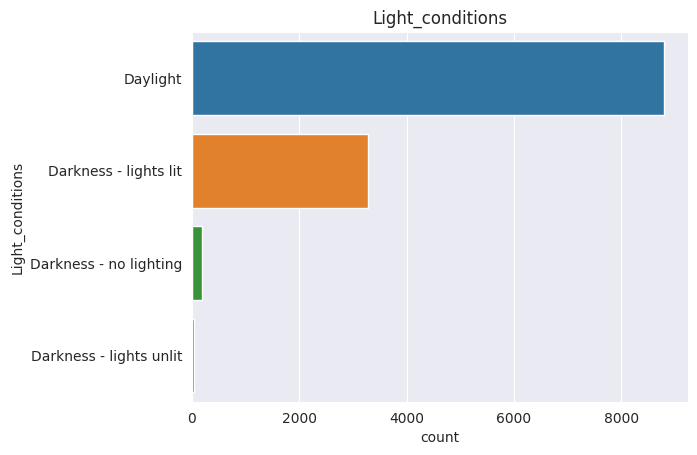

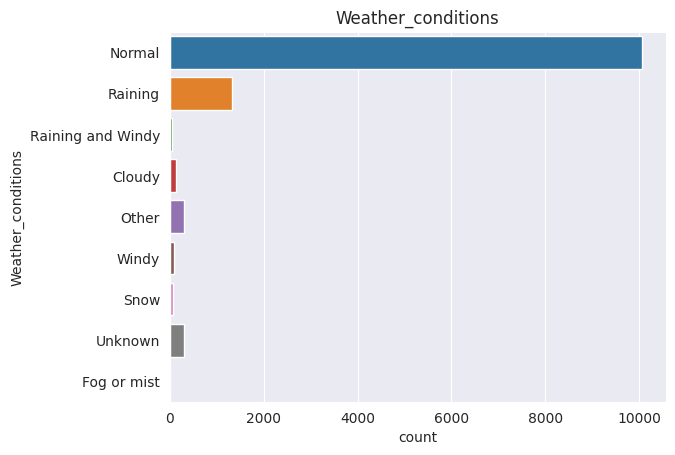

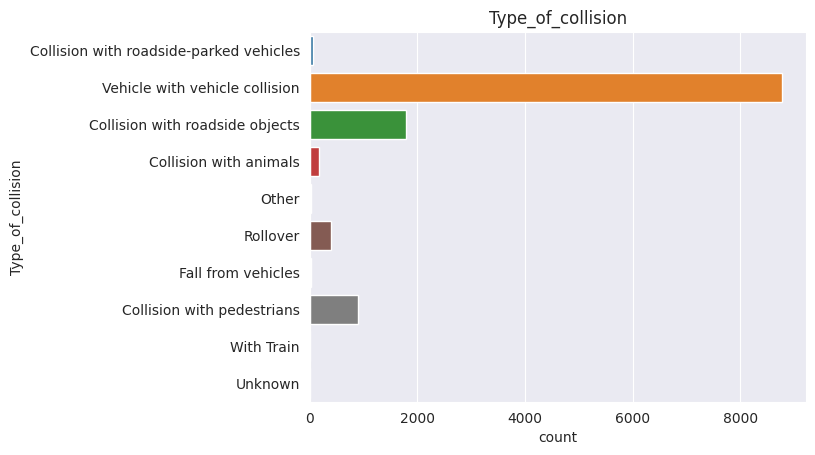

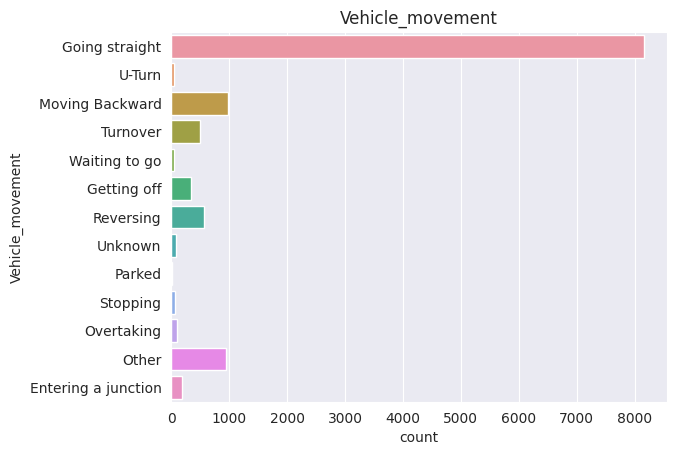

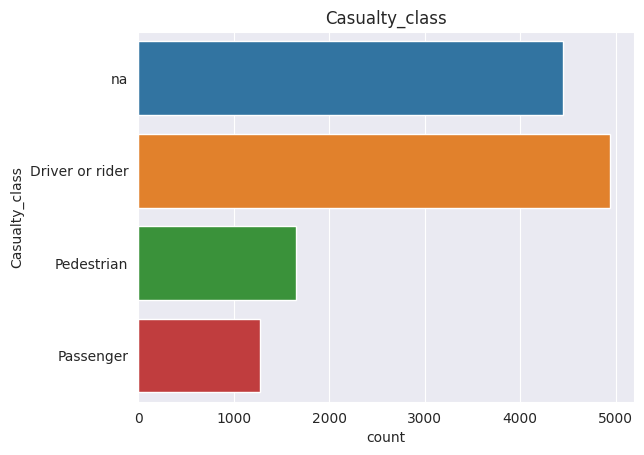

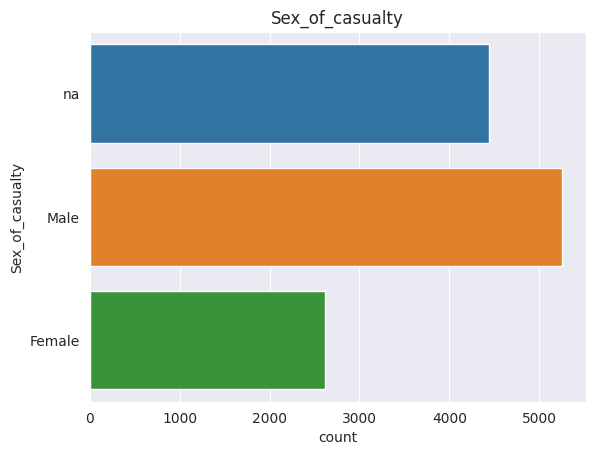

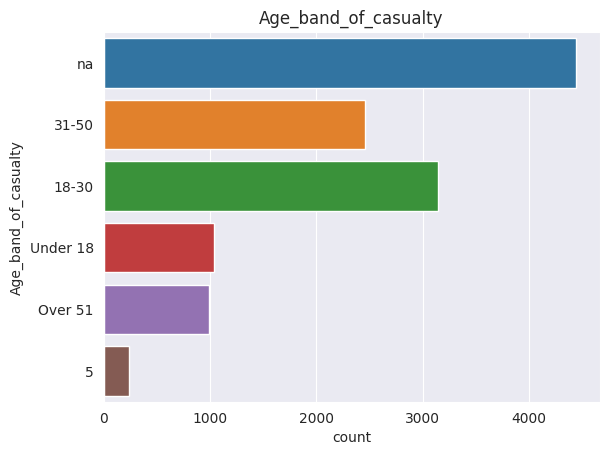

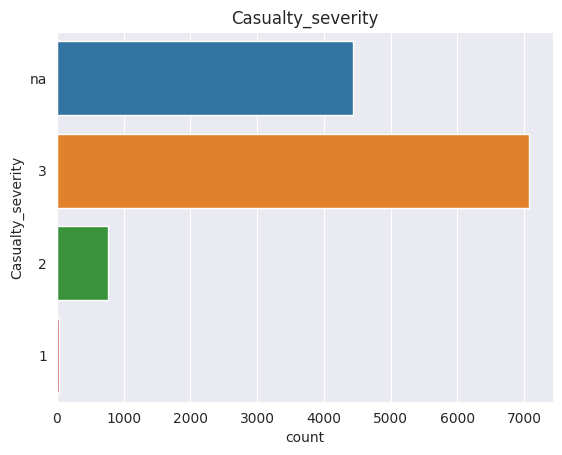

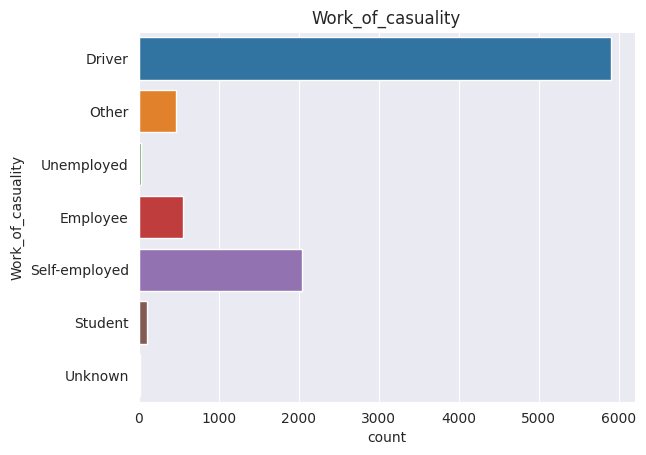

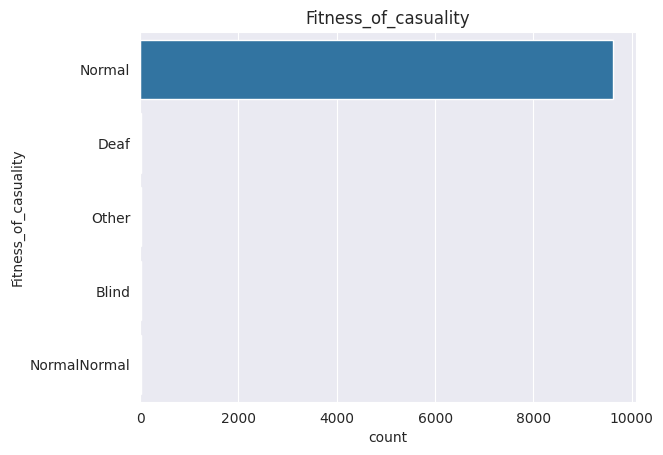

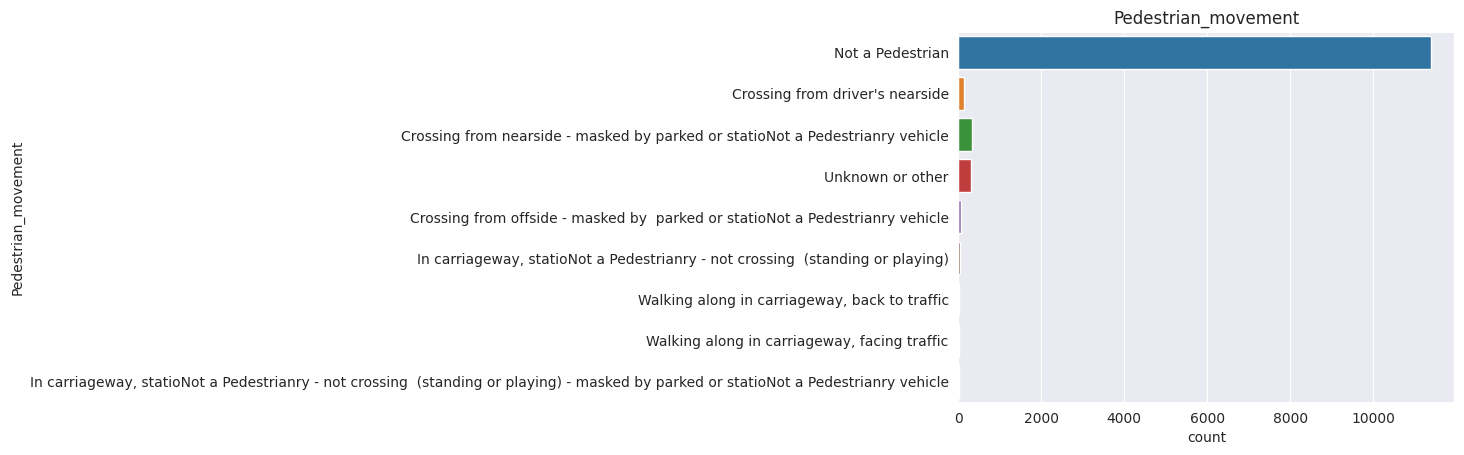

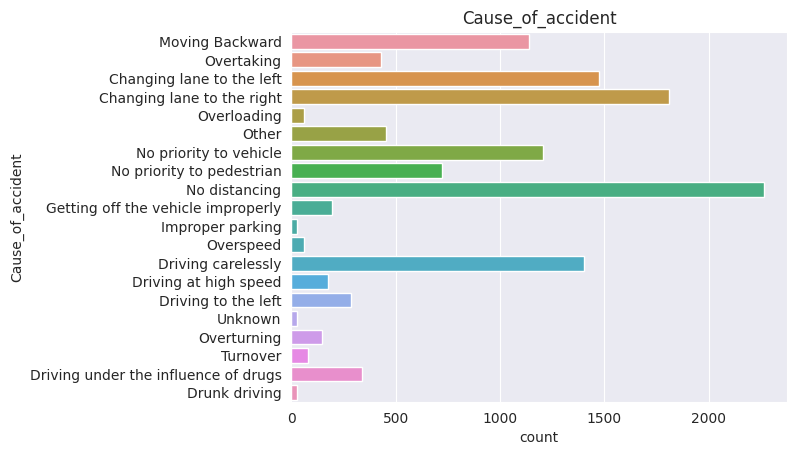

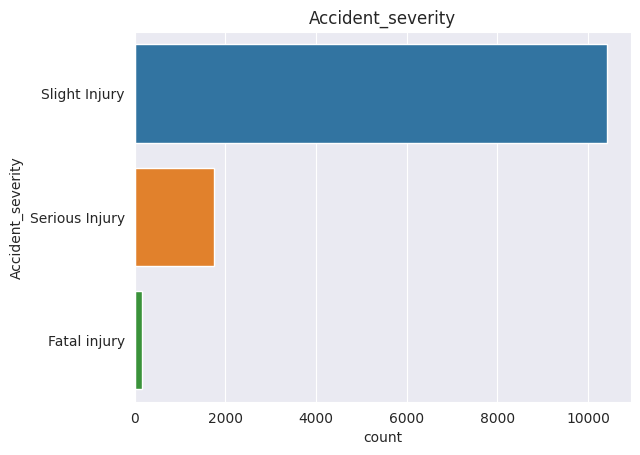

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.title(col)
        plt.show()

**Observations**
- More accidents happend in Friday
- Age of driver involved in accidents are between 18-50
- Most of the accidents are done of Male drivers
- Education level of drivers involved in accidents are mostly is Junior high school
- Most of the accidents are done by Employee not the owner of vehicle
- Person with about 5 to 10 years of driving experience tend to do accidents more.
- Automobile type of vehicle involved in accidents more
- Governmental and organization vehicles are not involved in accidents much, only individuals owning the vehicles are involved in accidents.
- Vehicle from 2 to 5 years of service tend to do more accidents.
- Most of vehicle involved in accidents do not have any defect.
- Office areas are most prone to accidents.
- Most accidents happend in Undived Two way, Tangent road with flat terrain, Y-shape junction, Asphalt roads, dry road surface conditions, in day light and normal conditions.
- Most of the collision are vehicle with vehicle collision with striaght vehicle movement.
- Most of the casualty class is Driver or Rider in specific Male driver between age of 18 to 30 years with casualty severity of 3. Most of them are Drivers as proffession. Their fitness level is Normal.
- Most of the accidents does not involve pedestrian.
- The primary cause of accident is not spacing the distance between the vehicle and while changing the lanes to right/left.
- Most of accidents has light severity.

### Multivariate Analysis

**Segment target by numerical features**

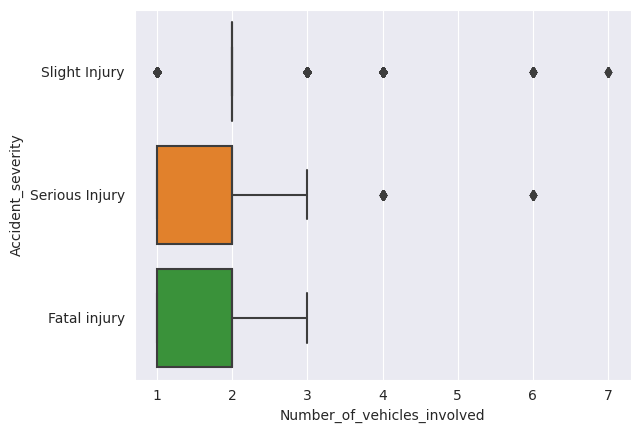

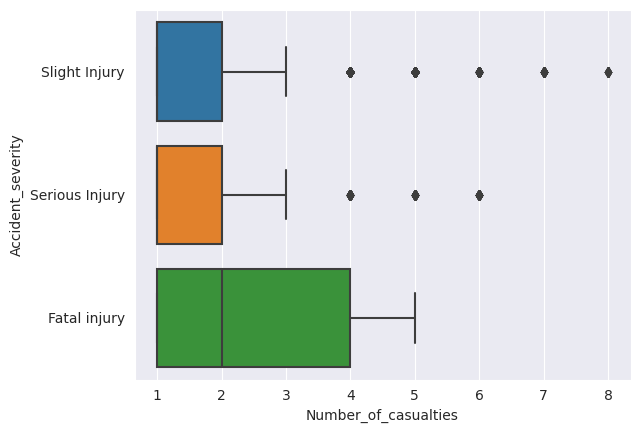

In [ ]:
num_cols = ['Number_of_vehicles_involved','Number_of_casualties']
for col in num_cols:
    sns.boxplot(y = df['Accident_severity'], x = col, data=df)
    plt.show()

- Most of the cases Serious and Fatal injuries happend with two vehicles involved in an accident.
- Most of the Fatal injuries happend to 4 casualties and Serious and Slight injuries happend to 2 casualties

**Target feature vs the other categorical features**

**Using crosstab to show tables of target vs categorical features**

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <=4:
        display(pd.crosstab(df['Accident_severity'], df[col], normalize='index'))

Sex_of_driver        Female      Male   Unknown
Accident_severity                              
Fatal injury       0.031646  0.962025  0.006329
Serious Injury     0.059667  0.930006  0.010327
Slight Injury      0.056841  0.927892  0.015266

Vehicle_driver_relation  Employee     Other     Owner   Unknown
Accident_severity                                              
Fatal injury             0.765101  0.006711  0.228188  0.000000
Serious Injury           0.817963  0.008439  0.172996  0.000603
Slight Injury            0.821432  0.010877  0.166381  0.001309

Owner_of_vehicle   Governmental  Organization     Other     Owner
Accident_severity                                                
Fatal injury           0.104575      0.026144  0.000000  0.869281
Serious Injury         0.078349      0.022727  0.000598  0.898325
Slight Injury          0.089320      0.026976  0.002098  0.881607

Defect_of_vehicle         5         7  No defect
Accident_severity                               
Fatal injury       0.000000  0.000000   1.000000
Serious Injury     0.005240  0.012227   0.982533
Slight Injury      0.004519  0.009339   0.986142

Road_surface_conditions       Dry  Flood over 3cm. deep      Snow  Wet or damp
Accident_severity                                                             
Fatal injury             0.765823              0.000000  0.000000     0.234177
Serious Injury           0.764200              0.000000  0.002295     0.233505
Slight Injury            0.757273              0.000192  0.006337     0.236198

Light_conditions   Darkness - lights lit  Darkness - lights unlit  \
Accident_severity                                                   
Fatal injury                    0.417722                 0.000000   
Serious Injury                  0.266781                 0.004016   
Slight Injury                   0.264522                 0.003169   

Light_conditions   Darkness - no lighting  Daylight  
Accident_severity                                    
Fatal injury                     0.031646  0.550633  
Serious Injury                   0.028112  0.701090  
Slight Injury                    0.013250  0.719059

Casualty_class     Driver or rider  Passenger  Pedestrian        na
Accident_severity                                                  
Fatal injury              0.449367   0.075949    0.170886  0.303797
Serious Injury            0.412507   0.104418    0.130809  0.352266
Slight Injury             0.398848   0.104273    0.133845  0.363034

Sex_of_casualty      Female      Male        na
Accident_severity                              
Fatal injury       0.183544  0.512658  0.303797
Serious Injury     0.207114  0.440620  0.352266
Slight Injury      0.214114  0.422852  0.363034

Casualty_severity         1         2         3        na
Accident_severity                                        
Fatal injury       0.000000  0.063291  0.632911  0.303797
Serious Injury     0.001721  0.056225  0.589788  0.352266
Slight Injury      0.002208  0.063658  0.571099  0.363034

Accident_severity  Fatal injury  Serious Injury  Slight Injury
Accident_severity                                             
Fatal injury                1.0             0.0            0.0
Serious Injury              0.0             1.0            0.0
Slight Injury               0.0             0.0            1.0

**Target across categorical features**

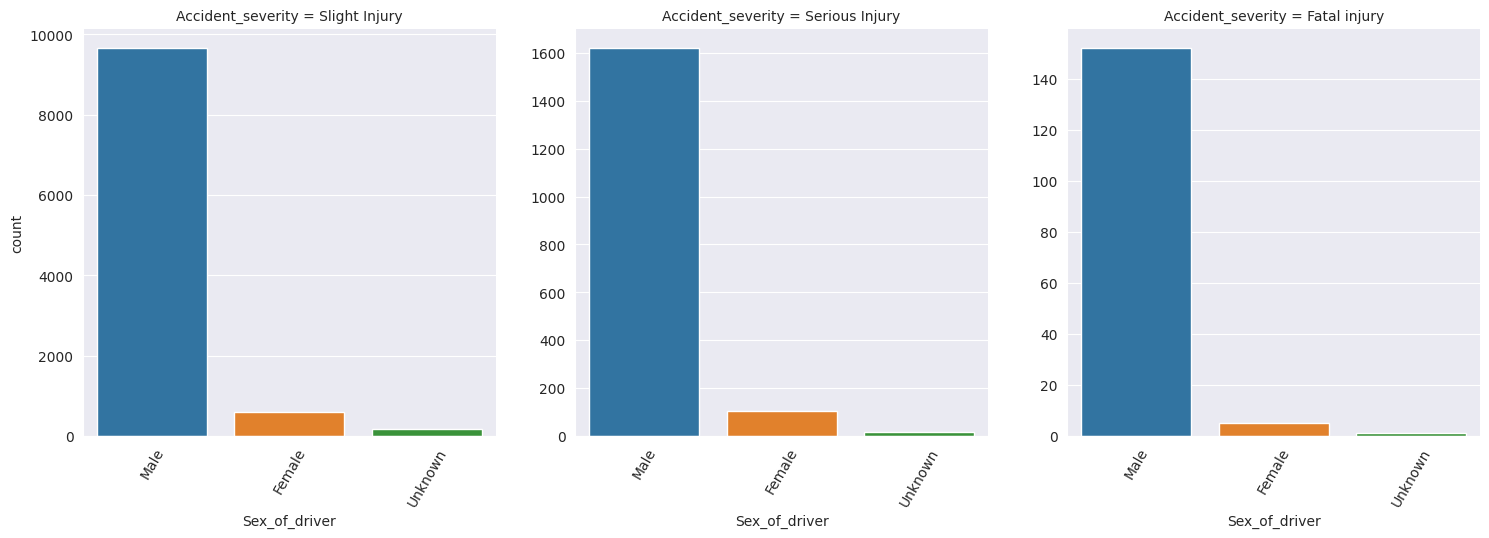

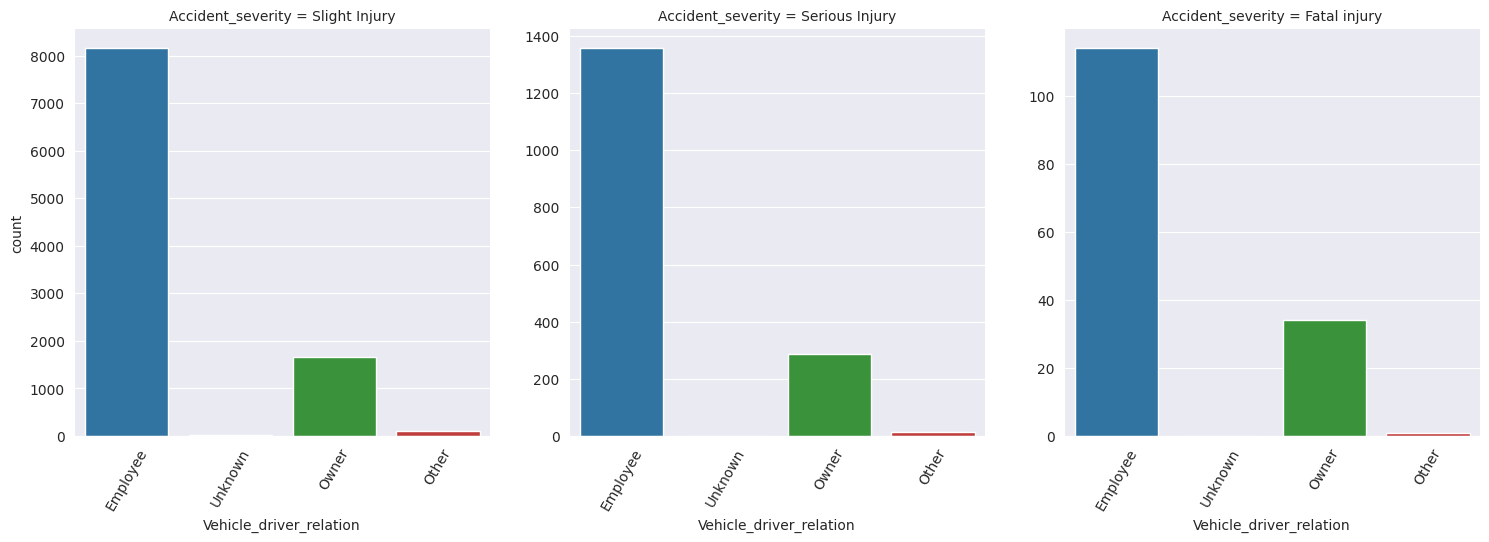

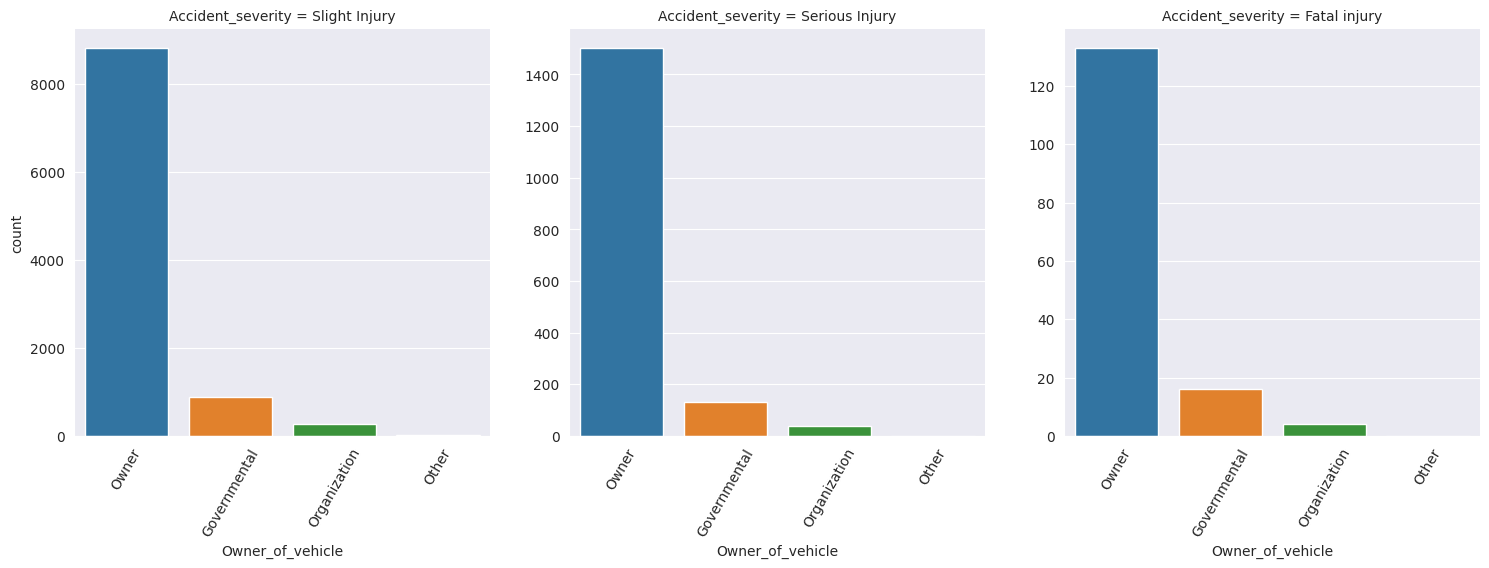

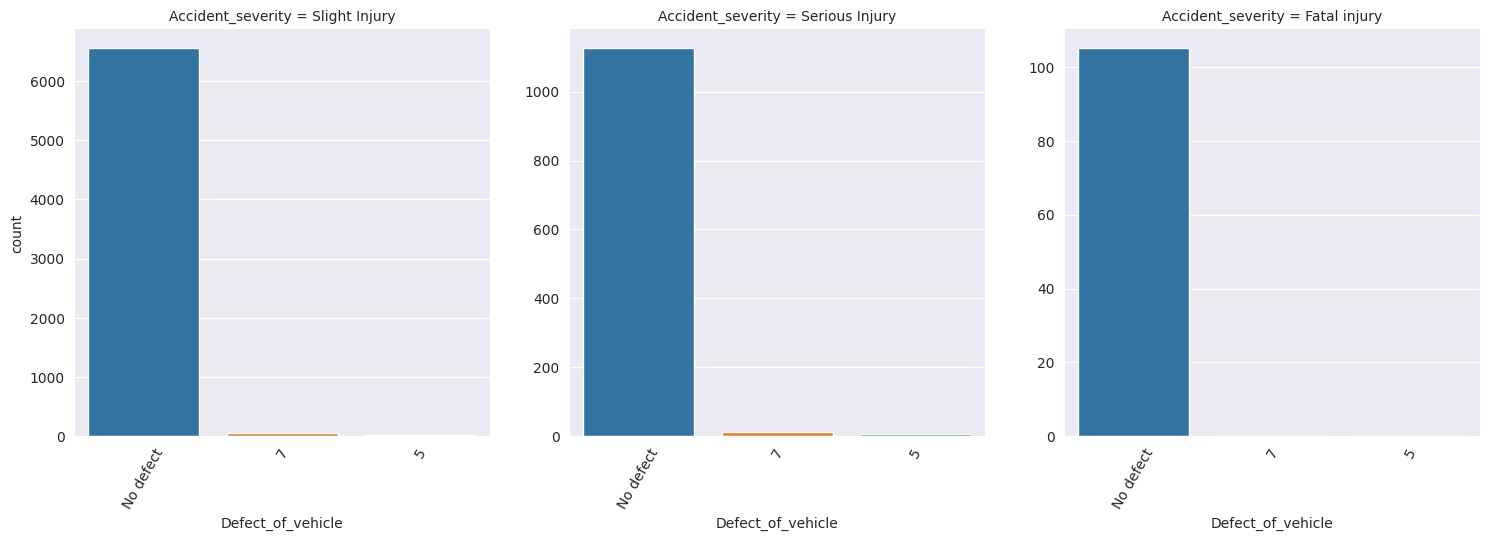

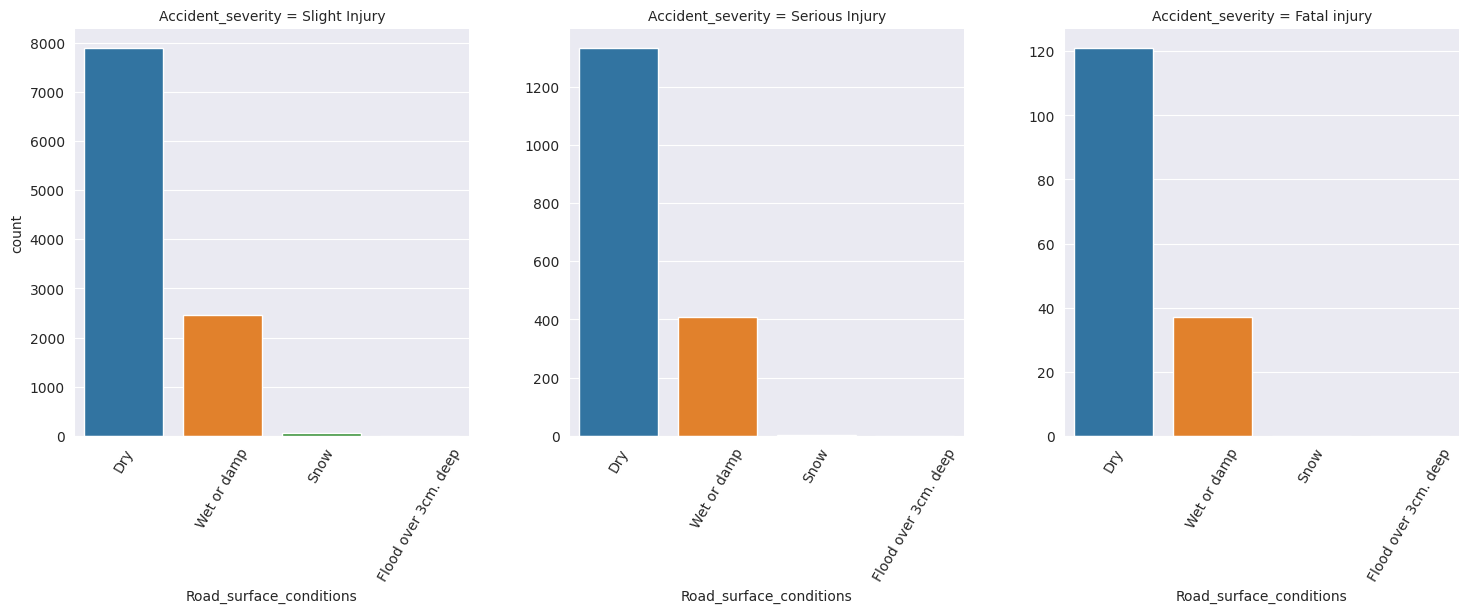

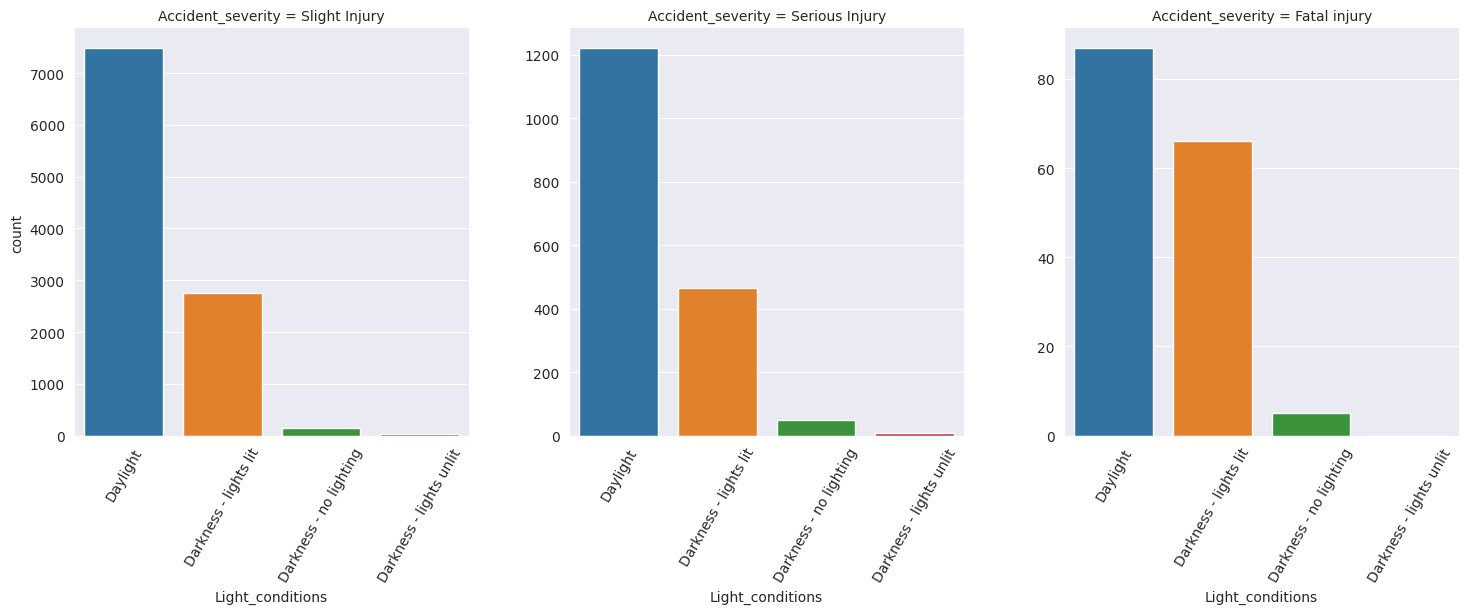

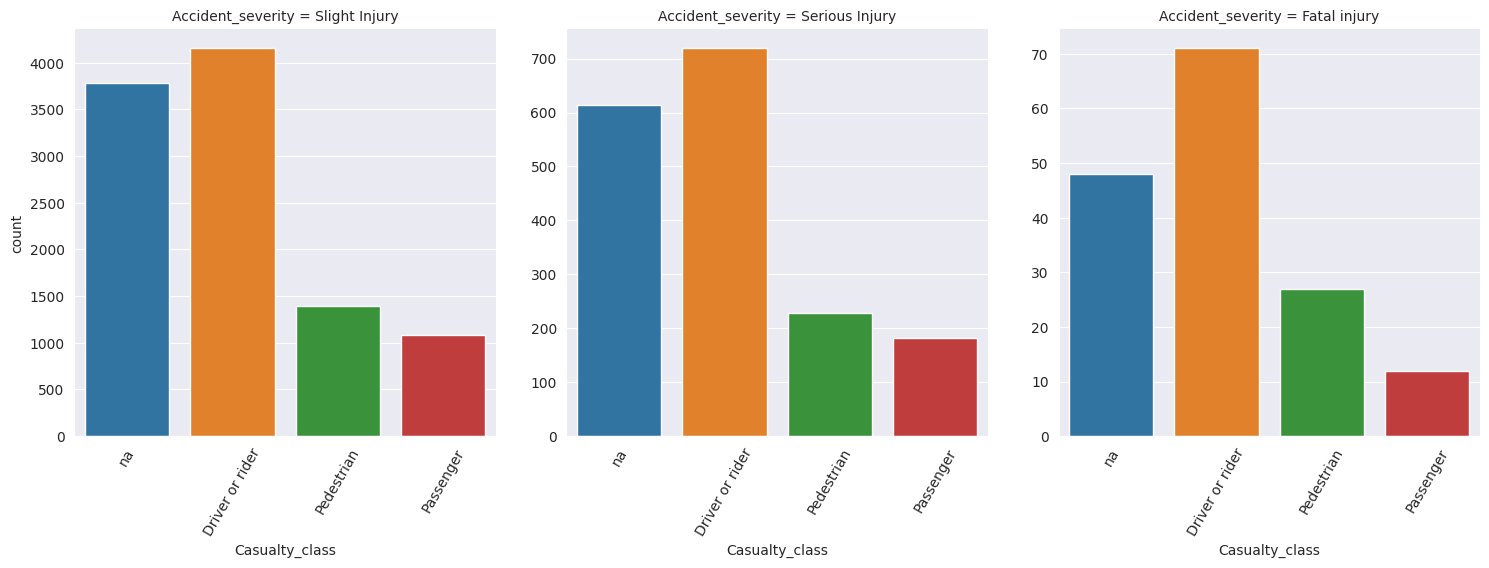

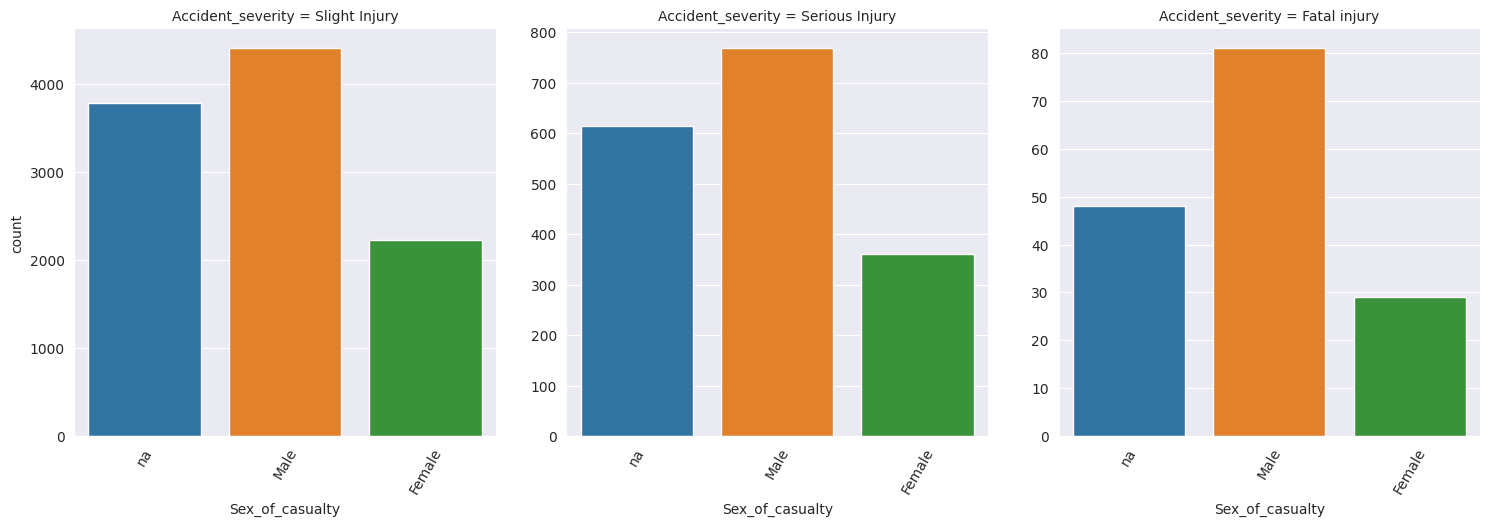

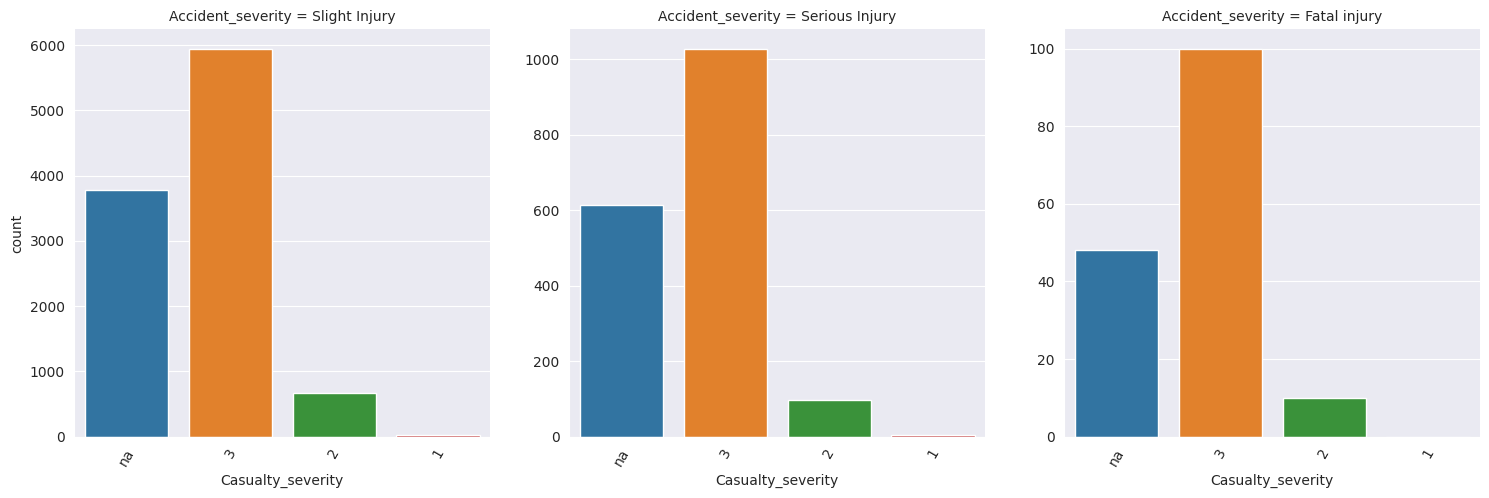

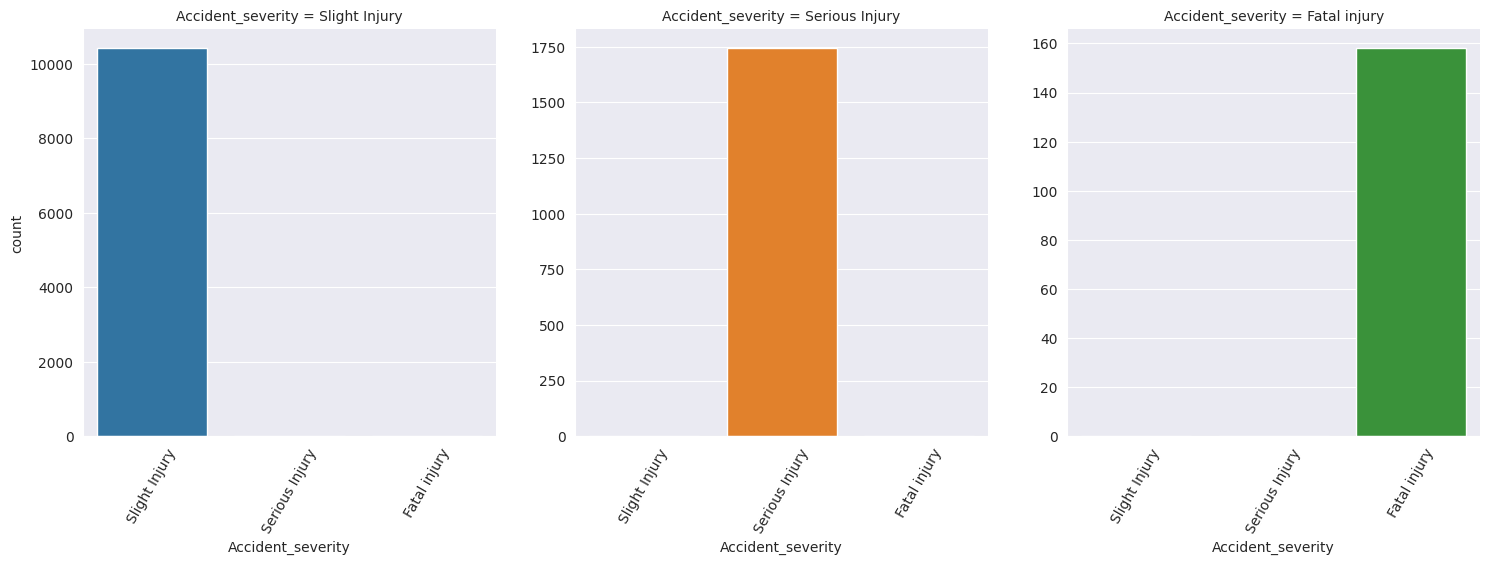

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 4:
        g = sns.catplot(x = col, kind='count', col = 'Accident_severity', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

**All Categorical vs all numeric features**

In [ ]:
df.groupby('Accident_severity').mean()

Number_of_vehicles_involved  Number_of_casualties
Accident_severity                                                   
Fatal injury                          1.797468              2.341772
Serious Injury                        1.895009              1.535284
Slight Injury                         2.068747              1.538262

In [ ]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 3:
        display(df.groupby(col)[['Number_of_vehicles_involved',  'Number_of_casualties']].mean());

Number_of_vehicles_involved  Number_of_casualties
Sex_of_driver                                                   
Female                            2.158345              1.312411
Male                              2.034537              1.563172
Unknown                           1.971910              1.511236

Number_of_vehicles_involved  Number_of_casualties
Defect_of_vehicle                                                   
5                                     2.166667              1.555556
7                                     2.078947              1.460526
No defect                             2.028289              1.547383

Number_of_vehicles_involved  Number_of_casualties
Sex_of_casualty                                                   
Female                              2.037405              1.533206
Male                                2.035408              1.571102
na                                  2.048841              1.529822

Number_of_vehicles_involved  Number_of_casualties
Accident_severity                                                   
Fatal injury                          1.797468              2.341772
Serious Injury                        1.895009              1.535284
Slight Injury                         2.068747              1.538262

**Correlations**

In [ ]:
corr = df.corr()
corr

Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                     1.000000              0.213427
Number_of_casualties                            0.213427              1.000000

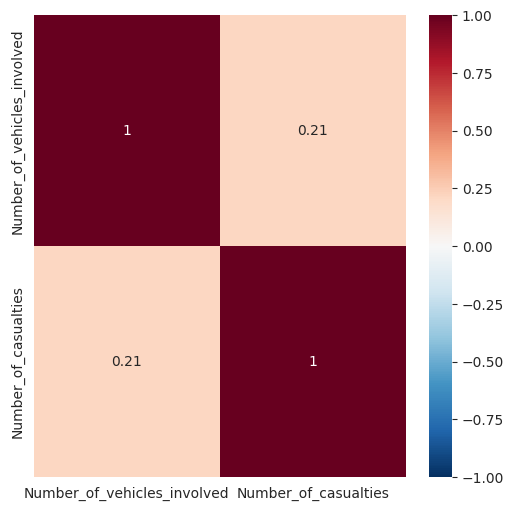

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

- Correlation between Number of vechicles involve and Number of casualties is less.

# Insights from EDA
- There are 12316 observations in the dataset and 32 columns in this dataset in which only 2 columns are of integer data type (Number_of_vehicles_involved and Number_of_casualties) and others are of object data type.
- Accident_severity is the target variable for this problem statement.
- Number of vehicles involved ranges from 1 to 4 vehicles and most of the accidents involved two vehicles.
- Number of casualties ranges from 1 to 8 but most of the time there is only one casualty followed by 2.
- Number of vehicles and Number of casualties has outliers.
- Most of the accidents happend in peak time both morning and evening.
- More accidents happend in Friday.
- Age of driver involved in accidents are between 18-50.
- Most of the accidents are done of Male drivers.
- Junior high school students tend to do more accidents.
- Most of the accidents are done by Employee not the owner of vehicle.
- Person with about 5 to 10 years of driving experience tend to do accidents more than others.
- Automobile type of vehicle involved in accidents more than others.
- Governmental and organization vehicles are not involved in accidents much, only individuals owning the vehicles are involved in accidents.
- Vehicle from 2 to 5 years of service tend to do more accidents.
- Most of vehicle involved in accidents do not have any defect.
- Office areas are most prone to accidents.
- Most accidents happend in Undived Two way, Tangent road with flat terrain, Y-shape junction, Asphalt roads, dry road surface conditions, in day light and normal conditions.
- Most of the collision are vehicle with vehicle collision with striaght vehicle movement.
- Most of the casualty class is Driver or Rider in specific Male driver between age of 18 to 30 years with casualty severity of 3. Most of them are Drivers as proffession. Their fitness level is Normal.
- Most of the accidents does not involve pedestrian.
- The primary cause of accident is not leaving enough space between the vehicles and while changing the lanes to right/left.
- Most of accidents have light severity.


**From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.**

# Data Preprocessing


- Missing value treatment
- Outliers detection and Treatment
- Encoding techniques  
- Imbalanced data treatment using SMOTE


## Missing Value Treatment

In [ ]:
from sklearn import preprocessing
import missingno as msno

**Checking the values of each category in Target variable**

In [ ]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [ ]:
df['Accident_severity'].value_counts(normalize=True)

Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: Accident_severity, dtype: float64

- Almost ~85% of the Accident severity has slight Injury and 14% of Serious Injury.
- Very less people got Fatal injury.

**Detecting missing values of the data**

In [ ]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count

Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Casualty_class                    0
Pedestrian_movement               0
Cause_of_accident                 0
Casualty_severity                 0
Age_band_of_casualty              0
Sex_of_casualty                   0
Time                              0
Road_surface_conditions           0
Number_of_casualties              0
Number_of_vehicles_involved       0
Weather_conditions                0
Light_conditions            

In [ ]:
missing_percent = (df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)
missing_percent

Defect_of_vehicle              35.945112
Service_year_of_vehicle        31.893472
Work_of_casuality              25.966223
Fitness_of_casuality           21.394933
Type_of_vehicle                 7.713543
Types_of_Junction               7.202014
Driving_experience              6.731082
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Owner_of_vehicle                3.913608
Lanes_or_Medians                3.126015
Vehicle_movement                2.500812
Area_accident_occured           1.940565
Road_surface_type               1.396557
Type_of_collision               1.258525
Road_allignment                 1.152972
Casualty_class                  0.000000
Pedestrian_movement             0.000000
Cause_of_accident               0.000000
Casualty_severity               0.000000
Age_band_of_casualty            0.000000
Sex_of_casualty                 0.000000
Time                            0.000000
Road_surface_conditions         0.000000
Number_of_casual

In [ ]:
missing_values_table = pd.concat([missing_count, missing_percent], axis=1)

In [ ]:
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values',  1 : 'Percentage'})

In [ ]:
missing_values_table

Missing Values  Percentage
Defect_of_vehicle                      4427   35.945112
Service_year_of_vehicle                3928   31.893472
Work_of_casuality                      3198   25.966223
Fitness_of_casuality                   2635   21.394933
Type_of_vehicle                         950    7.713543
Types_of_Junction                       887    7.202014
Driving_experience                      829    6.731082
Educational_level                       741    6.016564
Vehicle_driver_relation                 579    4.701202
Owner_of_vehicle                        482    3.913608
Lanes_or_Medians                        385    3.126015
Vehicle_movement                        308    2.500812
Area_accident_occured                   239    1.940565
Road_surface_type                       172    1.396557
Type_of_collision                       155    1.258525
Road_allignment                         142    1.152972
Casualty_class                            0    0.000000
Pedestrian_movement                       0    0.000000
Cause_of_accident                         0    0.000000
Casualty_severity                         0    0.000000
Age_band_of_casualty                      0    0.000000
Sex_of_casualty                           0    0.000000
Time                                      0    0.000000
Road_surface_conditions                   0    0.000000
Number_of_casualties                      0    0.000000
Number_of_vehicles_involved               0    0.000000
Weather_conditions                        0    0.000000
Light_conditions                          0    0.000000
Day_of_week                               0    0.000000
Sex_of_driver                             0    0.000000
Age_band_of_driver                        0    0.000000
Accident_severity                         0    0.000000

- These are the top 4 columns which has more missing values : Defect_of_vehicle with 35%, Service_year_of_vehicle with 31%, Work_of_casuality with 25% and Fitness_of_casuality with 21% of the dataset.
- There is no missing values in our target variable 'Accident_severity'.
- All features with missing values are of object data type. 'Mode' of the column should be used for imputing missing values to those columns.
- We can drop missing values with less than 10% of the data.
- We cam Impute values for Defect_of_vehicle, Service_year_of_vehicle, Work_of_casuality and Fitness_of_casuality.

### Treating Missing Values

In [ ]:
# Make a copy of df for data preprocessing
df1 = df.copy()

In [ ]:
# dropping columns that can cause imbalance while imputation
df1.drop(columns = ['Defect_of_vehicle', 'Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality'], inplace=True)

In [ ]:
df1.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity           

In [ ]:
impute_cols = [x for x in df1.isna().sum()[df1.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df1[feat].mode()[0]
    df1[feat].fillna(mode, inplace=True)

In [ ]:
df1.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [ ]:
df1.shape

(12316, 28)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Driving_experience           12316 non-null  object        
 6   Type_of_vehicle              12316 non-null  object        
 7   Owner_of_vehicle             12316 non-null  object        
 8   Service_year_of_vehicle      12316 non-null  object        
 9   Area_accident_occured        12316 non-null  object        
 10  Lanes_or_Medians             12316 non-null  object        
 11  Road_allignment              12316 non-nu

- After missing value treatment, we have 12316 records.

**Creating Hour and minute Column from Time column**

In [ ]:
df1['Hour'] = df1.Time.dt.hour
df1.Hour

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: Hour, Length: 12316, dtype: int64

In [ ]:
df1['Minute'] = df1.Time.dt.minute
df1.Minute

0         2
1         2
2         2
3         6
4         6
         ..
12311    15
12312     0
12313    55
12314    55
12315    55
Name: Minute, Length: 12316, dtype: int64

In [ ]:
df1.shape

(12316, 30)

**Deleting Time column**

In [ ]:
df1.drop(columns=['Time'], inplace=True)

In [ ]:
df1.shape

(12316, 29)

## Outliers detection using boxplot

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Driving_experience           12316 non-null  object
 5   Type_of_vehicle              12316 non-null  object
 6   Owner_of_vehicle             12316 non-null  object
 7   Service_year_of_vehicle      12316 non-null  object
 8   Area_accident_occured        12316 non-null  object
 9   Lanes_or_Medians             12316 non-null  object
 10  Road_allignment              12316 non-null  object
 11  Types_of_Junction            12316 non-null  object
 12  Road_surface_type            12316 non-null  object
 13  Road_surface_conditions      12

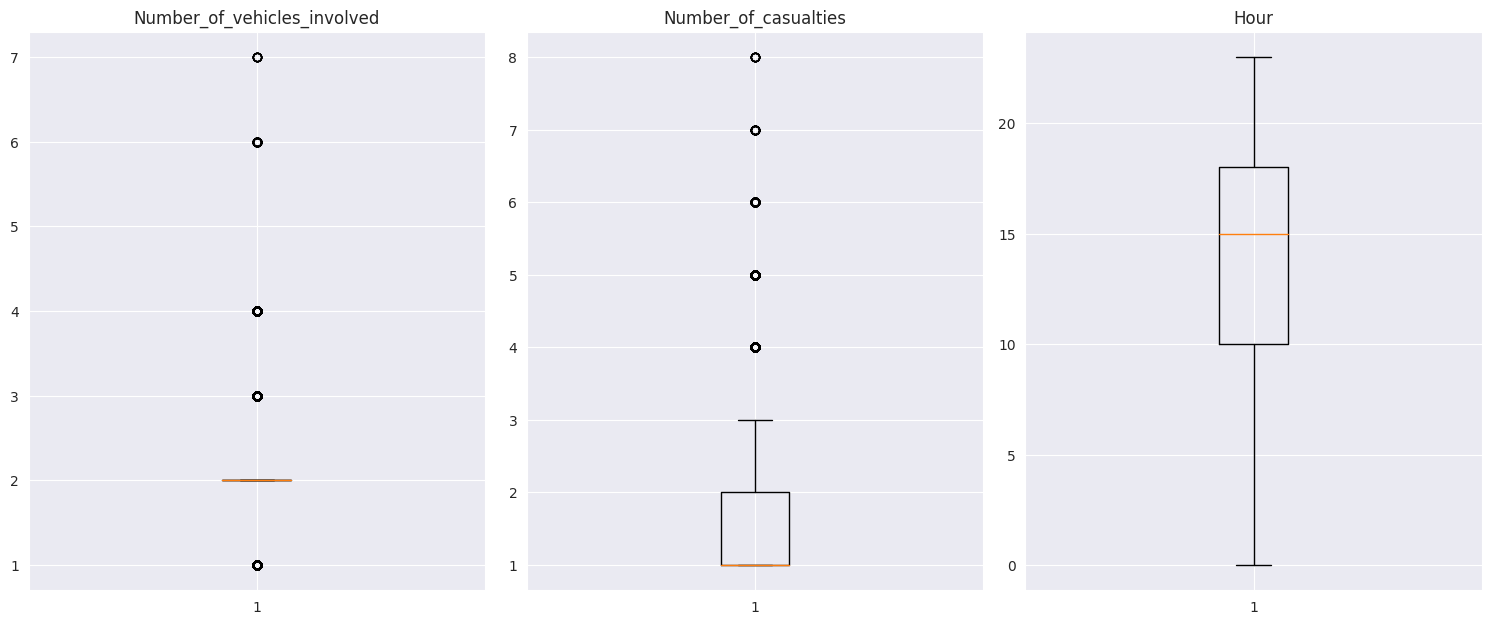

In [ ]:
import matplotlib.pyplot as plt
numerical_col = ["Number_of_vehicles_involved", "Number_of_casualties", "Hour"]
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers are seen in 'Number of vehicles involved' and 'Number of casualties' involved columns

### Treating Outliers
- Treating outliers in  'Number of vehicles involved' and 'Number of casualties' involved columns.

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
outlier_cols = ["Number_of_vehicles_involved", "Number_of_casualties"]
df1 = treat_outliers_all(df1, outlier_cols)

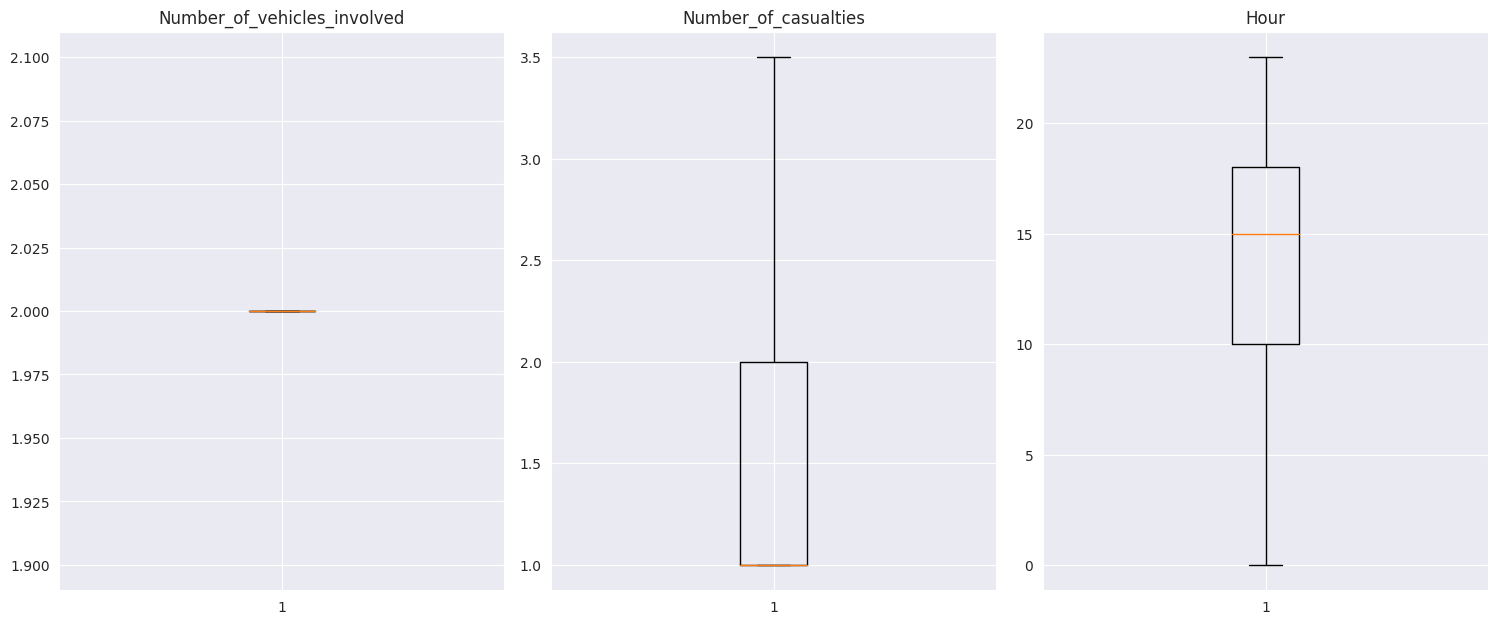

In [ ]:
import matplotlib.pyplot as plt
numerical_col = ["Number_of_vehicles_involved", "Number_of_casualties", "Hour"]
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers are treated successfully.

In [ ]:
df1.Number_of_casualties

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
12311    1.0
12312    1.0
12313    1.0
12314    1.0
12315    1.0
Name: Number_of_casualties, Length: 12316, dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day_of_week                  12316 non-null  object 
 1   Age_band_of_driver           12316 non-null  object 
 2   Sex_of_driver                12316 non-null  object 
 3   Educational_level            12316 non-null  object 
 4   Driving_experience           12316 non-null  object 
 5   Type_of_vehicle              12316 non-null  object 
 6   Owner_of_vehicle             12316 non-null  object 
 7   Service_year_of_vehicle      12316 non-null  object 
 8   Area_accident_occured        12316 non-null  object 
 9   Lanes_or_Medians             12316 non-null  object 
 10  Road_allignment              12316 non-null  object 
 11  Types_of_Junction            12316 non-null  object 
 12  Road_surface_type            12316 non-null  object 
 13  Road_surface_con

In [ ]:
df1['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

## Encoding techniques

In [ ]:
def ordinal_encoder(df, feats):
    for feat in feats:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df1 = ordinal_encoder(df1, df1.drop(['Accident_severity'], axis=1).columns)
df1.shape

(12316, 29)

In [ ]:
df1.head()

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0            1                   0              1                  0   
1            1                   1              1                  4   
2            1                   0              1                  4   
3            3                   0              1                  4   
4            3                   0              1                  4   

   Driving_experience  Type_of_vehicle  Owner_of_vehicle  \
0                   0                0                 3   
1                   3               11                 3   
2                   0                5                 3   
3                   2               11                 0   
4                   1                0                 3   

   Service_year_of_vehicle  Area_accident_occured  Lanes_or_Medians  \
0                        3                      9                 2   
1                        2                      6                 4   
2                        5                      1                 6   
3                        5                      6                 6   
4                        2                      4                 6   

   Road_allignment  Types_of_Junction  Road_surface_type  \
0                5                  1                  0   
1                5                  1                  0   
2                5                  1                  0   
3                6                  7                  2   
4                5                  7                  0   

   Road_surface_conditions  Light_conditions  Weather_conditions  \
0                        0                 3                   2   
1                        0                 3                   2   
2                        0                 3                   2   
3                        0                 0                   2   
4                        0                 0                   2   

   Type_of_collision  Number_of_vehicles_involved  Number_of_casualties  \
0                  3                            0                     1   
1                  8                            0                     1   
2                  2                            0                     1   
3                  8                            0                     1   
4                  8                            0                     1   

   Vehicle_movement  Casualty_class  Sex_of_casualty  Age_band_of_casualty  \
0                 2               3                2                     5   
1                 2               3                2                     5   
2                 2               0                1                     1   
3                 2               2                0                     0   
4                 2               3                2                     5   

   Casualty_severity  Pedestrian_movement  Cause_of_accident  \
0                  3                    5                  9   
1                  3                    5                 16   
2                  2                    5                  0   
3                  2                    5                  1   
4                  3                    5                 16   

  Accident_severity  Hour  Minute  
0     Slight Injury    17       2  
1     Slight Injury    17       2  
2    Serious Injury    17       2  
3     Slight Injury     1       6  
4     Slight Injury     1       6

### Split Data

In [ ]:
X = df1.drop("Accident_severity", axis=1)  # Features
y = df1["Accident_severity"]  # Labels (Target Variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [ ]:
y.value_counts(normalize=True)

Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: Accident_severity, dtype: float64

### Upsampling

In [ ]:
#upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [ ]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

# Modeling

In [ ]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


## Baseline Modelling

In [ ]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)

    return scores,models

In [ ]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.803788903924222], 'rf': [0.7959404600811908], 'extree': [0.8121786197564276]}


**Accuracy Scores:**
- XGB = 80.73
- Random Forest = 79.59
- Extra Trees = 80.86

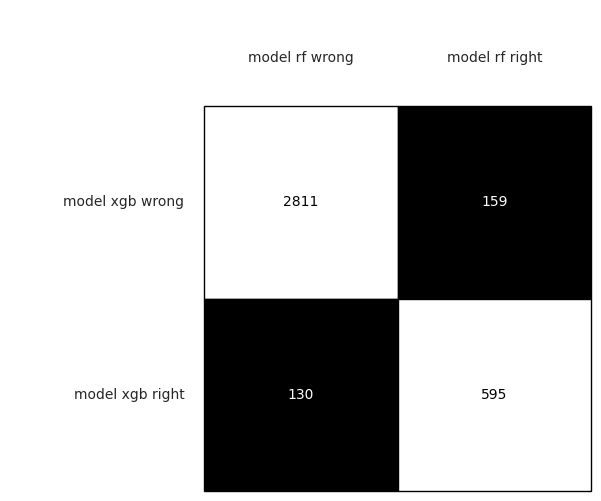

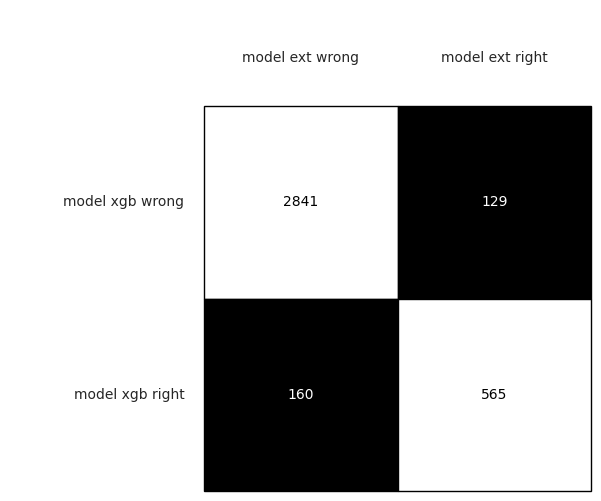

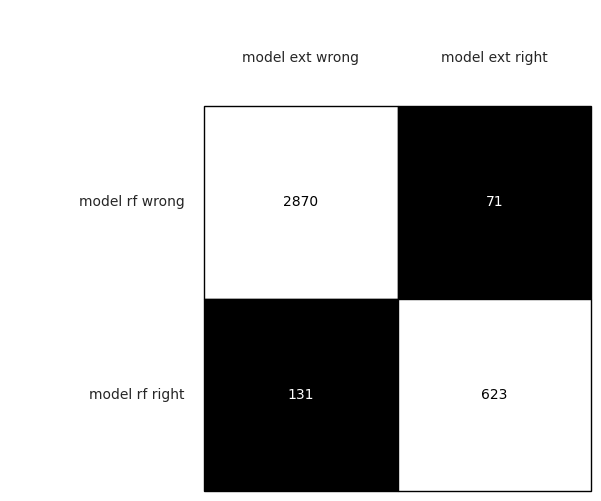

In [ ]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test,
                    y_pred_xgb,
                    y_pred_rf,
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [ ]:
def model_performance(model, y_test, y_hat) :
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))


    #plots
    model = model

    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False,
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)

    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14

    py.iplot(fig,filename='model-performance')

### EXtree Model

In [ ]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [ ]:
model_performance(extree,y_test, y_pred)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[   3    1   48]
 [   0   45  507]
 [   1  133 2957]]


In [ ]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.81
Precision: 0.75
Recall: 0.81
F1-score: 0.77


**Extree model accuracy is 81% and F1-Score is 77%**

## Hyperparameter Tuning

In [ ]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.8383112360595697)

**Observation**
- `Parameter:` 'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 11, min_samples_split': 2, 'n_estimators': 300
- `Best Score:` 83.83

In [ ]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': None, 'max_depth': 15, 'min_samples_split': 3},
 0.9100654207983236)

In [ ]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 300)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=300)

In [ ]:
print(extree_tuned.feature_importances_)

[0.05614811 0.06207516 0.01639274 0.0320642  0.04443263 0.03305826
 0.0216764  0.03616675 0.02943366 0.04083958 0.01516001 0.04499011
 0.01220049 0.04556596 0.07412743 0.01984383 0.03598033 0.
 0.08044886 0.02003763 0.03524965 0.03601218 0.03117868 0.0271209
 0.01169731 0.0407555  0.04137522 0.05596844]


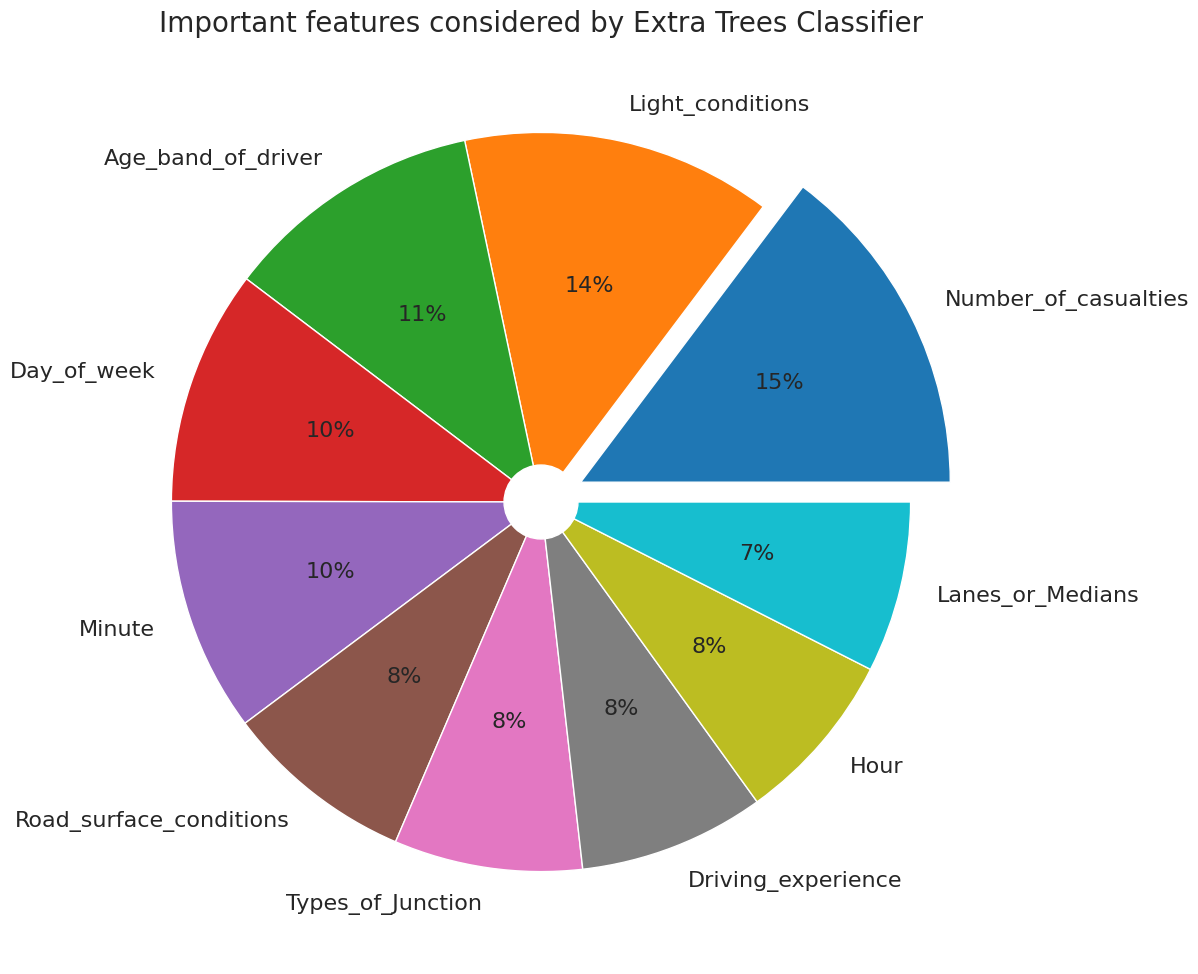

In [ ]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

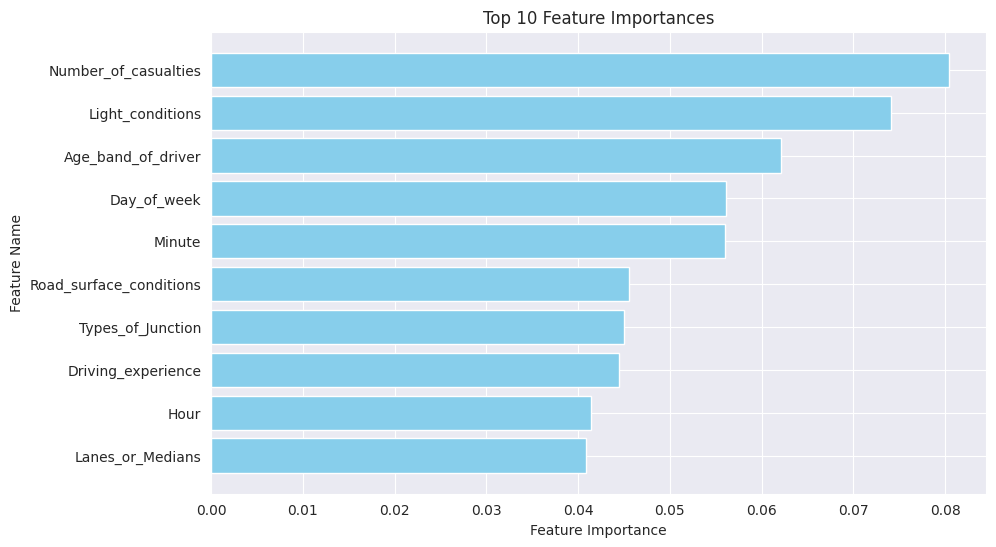

In [ ]:
# Get feature importances from the trained model
feature_importances = extree_tuned.feature_importances_

# Get the names of the features (assuming you have them stored in a list)
# Replace 'feature_names' with your actual feature names
feature_names = X_train.columns.tolist()

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = importance_df.head(10)

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

-**These are the top 10 features of our dataset**

In [ ]:
importance_df.head(10)

Feature  Importance
18     Number_of_casualties    0.080449
14         Light_conditions    0.074127
1        Age_band_of_driver    0.062075
0               Day_of_week    0.056148
27                   Minute    0.055968
13  Road_surface_conditions    0.045566
11        Types_of_Junction    0.044990
4        Driving_experience    0.044433
26                     Hour    0.041375
9          Lanes_or_Medians    0.040840

In [ ]:
y_pred = extree_tuned.predict(X_test)

In [ ]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.76
Precision: 0.73
Recall: 0.76
F1-score: 0.74


- F1 Score of our Extree tuned model is 74% and Accuracy of the model is 76%.

In [86]:
import joblib

In [87]:
joblib.dump(extree_tuned, 'extree.joblib')

['extree.joblib']